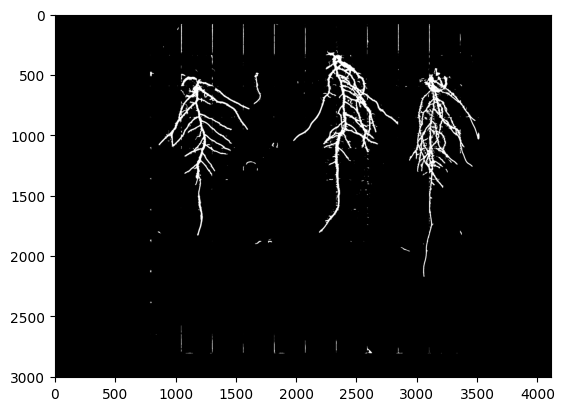

In [66]:
import cv2
import os
import numpy as np
import matplotlib.pyplot as plt

# Step 1: Load the predicted mask from Task 5
predicted_mask_path = "task5_test_image_prediction_artjom_234535.png"
binary_mask = cv2.imread(predicted_mask_path, cv2.IMREAD_GRAYSCALE)

# Ensure binary mask (0 or 255)
binary_mask[binary_mask > 0] = 255

plt.imshow(binary_mask, cmap="gray")

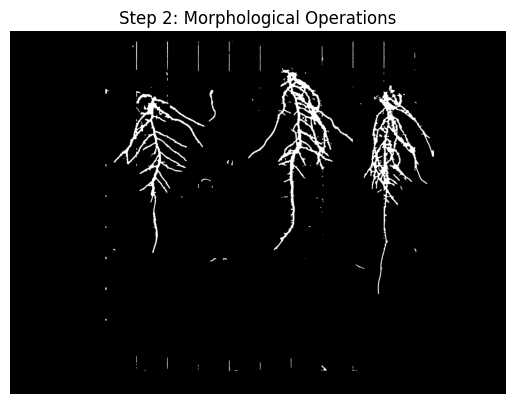

In [67]:
# Step 2: Apply morphological operations to clean the mask
kernel = np.ones((4, 4), np.uint8)
cleaned_mask = cv2.morphologyEx(binary_mask, cv2.MORPH_CLOSE, kernel, iterations=2)  # Close small gaps
cleaned_mask = cv2.morphologyEx(cleaned_mask, cv2.MORPH_OPEN, kernel, iterations=1)  # Remove small noise

plt.figure()
plt.title("Step 2: Morphological Operations")
plt.imshow(cleaned_mask, cmap="gray")
plt.axis("off")
plt.show()

In [68]:
# Step 3: Find connected components
num_labels, labels, stats, centroids = cv2.connectedComponentsWithStats(cleaned_mask)

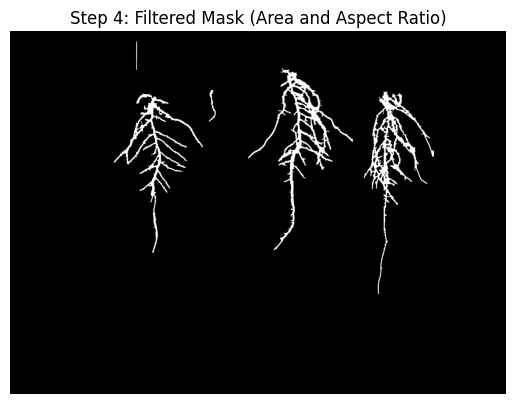

In [69]:
# Step 4: Filter objects based on area and aspect ratio
min_root_area = 1500  # Minimum area to consider an object as a root
aspect_ratio_threshold = 1.7  # Minimum aspect ratio (length/width) for roots

filtered_mask = np.zeros_like(binary_mask, dtype=np.uint8)

for label_idx in range(1, num_labels):  # Skip background (label 0)
    x, y, w, h, area = stats[label_idx, cv2.CC_STAT_LEFT], stats[label_idx, cv2.CC_STAT_TOP], \
                       stats[label_idx, cv2.CC_STAT_WIDTH], stats[label_idx, cv2.CC_STAT_HEIGHT], \
                       stats[label_idx, cv2.CC_STAT_AREA]

    # Calculate aspect ratio (length/width)
    aspect_ratio = max(w, h) / min(w, h) if min(w, h) > 0 else 0

    # Filter based on area and aspect ratio
    if area >= min_root_area and aspect_ratio >= aspect_ratio_threshold:
        filtered_mask[labels == label_idx] = 255

plt.figure()
plt.title("Step 4: Filtered Mask (Area and Aspect Ratio)")
plt.imshow(filtered_mask, cmap="gray")
plt.axis("off")
plt.show()

In [70]:
# Step 5: Extract individual roots
num_labels_filtered, labels_filtered, stats_filtered, _ = cv2.connectedComponentsWithStats(filtered_mask)

individual_roots = []
for label_idx in range(1, num_labels_filtered):  # Skip background
    root_mask = np.zeros_like(filtered_mask, dtype=np.uint8)
    root_mask[labels_filtered == label_idx] = 255
    individual_roots.append(root_mask)

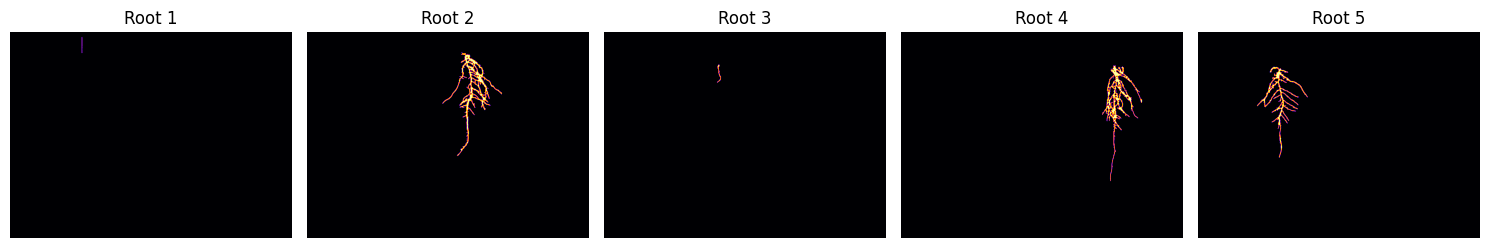

In [71]:
# Step 6: Visualize individual roots
fig, axes = plt.subplots(1, len(individual_roots), figsize=(15, 5))
for i, root_mask in enumerate(individual_roots):
    axes[i].imshow(root_mask, cmap="inferno")
    axes[i].axis("off")
    axes[i].set_title(f"Root {i+1}")
plt.tight_layout()
plt.show()

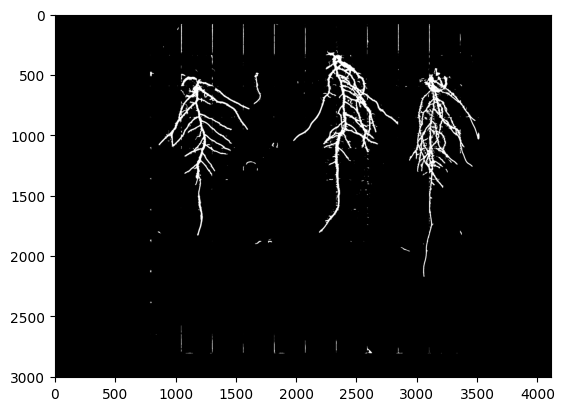

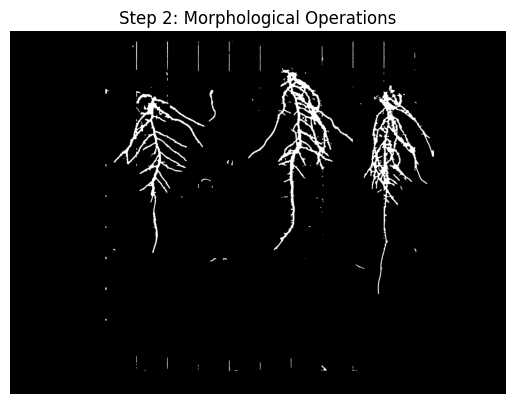

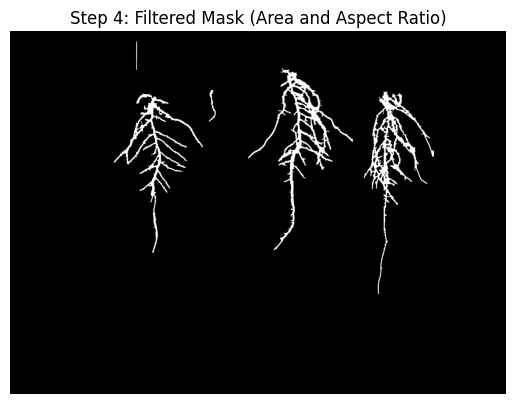

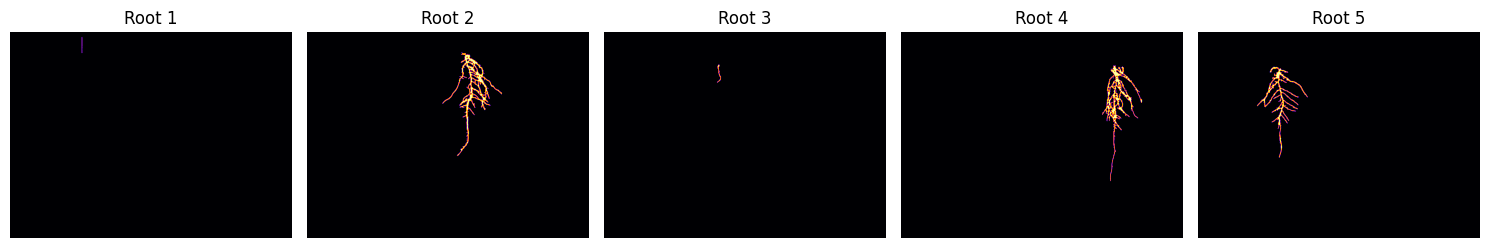

In [75]:
import cv2
import os
import numpy as np
import matplotlib.pyplot as plt

# Step 1: Load the predicted mask from Task 5
predicted_mask_path = "task5_test_image_prediction_artjom_234535.png"
binary_mask = cv2.imread(predicted_mask_path, cv2.IMREAD_GRAYSCALE)

# Ensure binary mask (0 or 255)
binary_mask[binary_mask > 0] = 255

plt.imshow(binary_mask, cmap="gray")

# Step 2: Apply morphological operations to clean the mask
kernel = np.ones((4, 4), np.uint8)
cleaned_mask = cv2.morphologyEx(binary_mask, cv2.MORPH_CLOSE, kernel, iterations=2)  # Close small gaps
cleaned_mask = cv2.morphologyEx(cleaned_mask, cv2.MORPH_OPEN, kernel, iterations=1)  # Remove small noise

plt.figure()
plt.title("Step 2: Morphological Operations")
plt.imshow(cleaned_mask, cmap="gray")
plt.axis("off")
plt.show()

# Step 3: Find connected components
num_labels, labels, stats, centroids = cv2.connectedComponentsWithStats(cleaned_mask)

# Step 4: Filter objects based on area and aspect ratio
min_root_area = 1500  # Minimum area to consider an object as a root
aspect_ratio_threshold = 1.7  # Minimum aspect ratio (length/width) for roots

filtered_mask = np.zeros_like(binary_mask, dtype=np.uint8)

for label_idx in range(1, num_labels):  # Skip background (label 0)
    x, y, w, h, area = stats[label_idx, cv2.CC_STAT_LEFT], stats[label_idx, cv2.CC_STAT_TOP], \
                       stats[label_idx, cv2.CC_STAT_WIDTH], stats[label_idx, cv2.CC_STAT_HEIGHT], \
                       stats[label_idx, cv2.CC_STAT_AREA]

    # Calculate aspect ratio (length/width)
    aspect_ratio = max(w, h) / min(w, h) if min(w, h) > 0 else 0

    # Filter based on area and aspect ratio
    if area >= min_root_area and aspect_ratio >= aspect_ratio_threshold:
        # Ignore components touching the top boundary
        if y > 10:  # Adjust this threshold if needed
            filtered_mask[labels == label_idx] = 255

plt.figure()
plt.title("Step 4: Filtered Mask (Area and Aspect Ratio)")
plt.imshow(filtered_mask, cmap="gray")
plt.axis("off")
plt.show()

# Step 5: Extract individual roots
num_labels_filtered, labels_filtered, stats_filtered, _ = cv2.connectedComponentsWithStats(filtered_mask)

individual_roots = []
for label_idx in range(1, num_labels_filtered):  # Skip background
    root_mask = np.zeros_like(filtered_mask, dtype=np.uint8)
    root_mask[labels_filtered == label_idx] = 255
    individual_roots.append(root_mask)

# Step 6: Visualize individual roots
fig, axes = plt.subplots(1, len(individual_roots), figsize=(15, 5))
for i, root_mask in enumerate(individual_roots):
    axes[i].imshow(root_mask, cmap="inferno")
    axes[i].axis("off")
    axes[i].set_title(f"Root {i+1}")
plt.tight_layout()
plt.show()

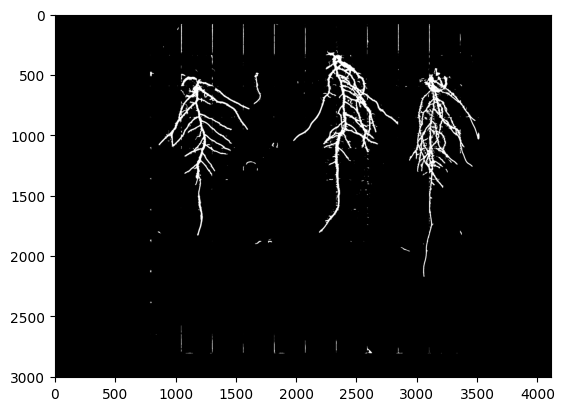

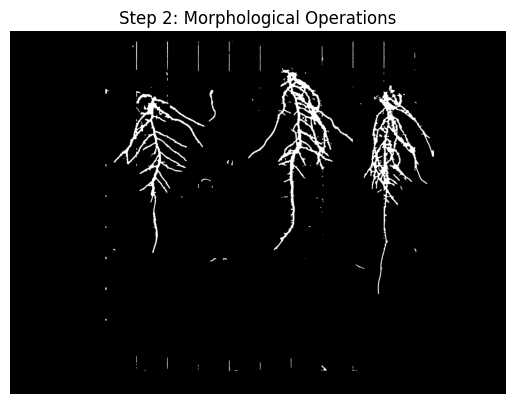

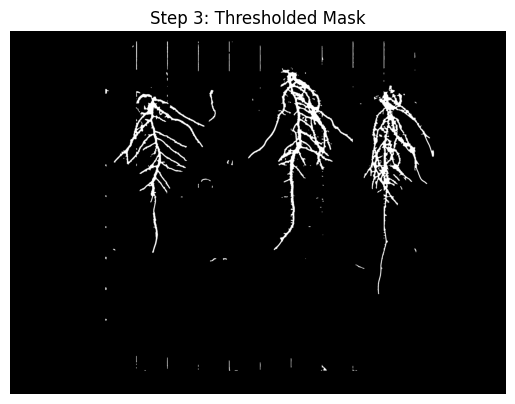

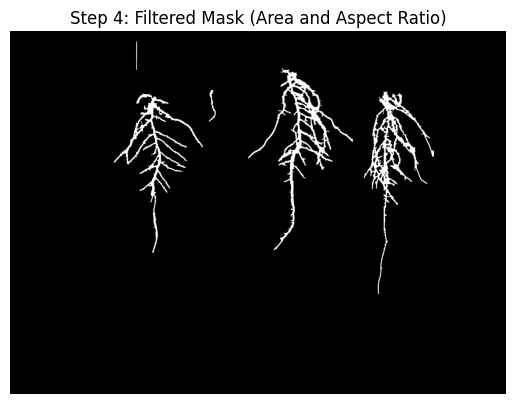

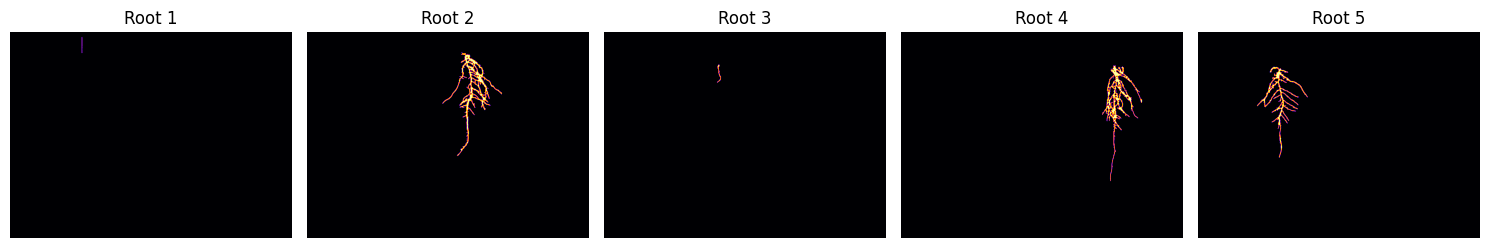

In [76]:
import cv2
import os
import numpy as np
import matplotlib.pyplot as plt

# Step 1: Load the predicted mask from Task 5
predicted_mask_path = "task5_test_image_prediction_artjom_234535.png"
binary_mask = cv2.imread(predicted_mask_path, cv2.IMREAD_GRAYSCALE)

# Ensure binary mask (0 or 255)
binary_mask[binary_mask > 0] = 255

plt.imshow(binary_mask, cmap="gray")

# Step 2: Apply morphological operations to clean the mask
kernel = np.ones((4, 4), np.uint8)
cleaned_mask = cv2.morphologyEx(binary_mask, cv2.MORPH_CLOSE, kernel, iterations=2)  # Close small gaps
cleaned_mask = cv2.morphologyEx(cleaned_mask, cv2.MORPH_OPEN, kernel, iterations=1)  # Remove small noise

plt.figure()
plt.title("Step 2: Morphological Operations")
plt.imshow(cleaned_mask, cmap="gray")
plt.axis("off")
plt.show()

# Step 3: Apply additional thresholding to enhance roots
_, thresholded_mask = cv2.threshold(cleaned_mask, 127, 255, cv2.THRESH_BINARY)

plt.figure()
plt.title("Step 3: Thresholded Mask")
plt.imshow(thresholded_mask, cmap="gray")
plt.axis("off")
plt.show()

# Step 4: Find connected components
num_labels, labels, stats, centroids = cv2.connectedComponentsWithStats(thresholded_mask)

# Step 5: Filter objects based on area and aspect ratio
min_root_area = 1500  # Minimum area to consider an object as a root
aspect_ratio_threshold = 1.7  # Minimum aspect ratio (length/width) for roots

filtered_mask = np.zeros_like(binary_mask, dtype=np.uint8)

for label_idx in range(1, num_labels):  # Skip background (label 0)
    x, y, w, h, area = stats[label_idx, cv2.CC_STAT_LEFT], stats[label_idx, cv2.CC_STAT_TOP], \
                       stats[label_idx, cv2.CC_STAT_WIDTH], stats[label_idx, cv2.CC_STAT_HEIGHT], \
                       stats[label_idx, cv2.CC_STAT_AREA]

    # Calculate aspect ratio (length/width)
    aspect_ratio = max(w, h) / min(w, h) if min(w, h) > 0 else 0

    # Filter based on area and aspect ratio
    if area >= min_root_area and aspect_ratio >= aspect_ratio_threshold:
        # Additional filter to remove components near the top boundary
        if y > 50:  # Adjust this threshold as needed
            filtered_mask[labels == label_idx] = 255

plt.figure()
plt.title("Step 4: Filtered Mask (Area and Aspect Ratio)")
plt.imshow(filtered_mask, cmap="gray")
plt.axis("off")
plt.show()

# Step 6: Extract individual roots
num_labels_filtered, labels_filtered, stats_filtered, _ = cv2.connectedComponentsWithStats(filtered_mask)

individual_roots = []
for label_idx in range(1, num_labels_filtered):  # Skip background
    root_mask = np.zeros_like(filtered_mask, dtype=np.uint8)
    root_mask[labels_filtered == label_idx] = 255
    individual_roots.append(root_mask)

# Step 7: Visualize individual roots
fig, axes = plt.subplots(1, len(individual_roots), figsize=(15, 5))
for i, root_mask in enumerate(individual_roots):
    axes[i].imshow(root_mask, cmap="inferno")
    axes[i].axis("off")
    axes[i].set_title(f"Root {i+1}")
plt.tight_layout()
plt.show()

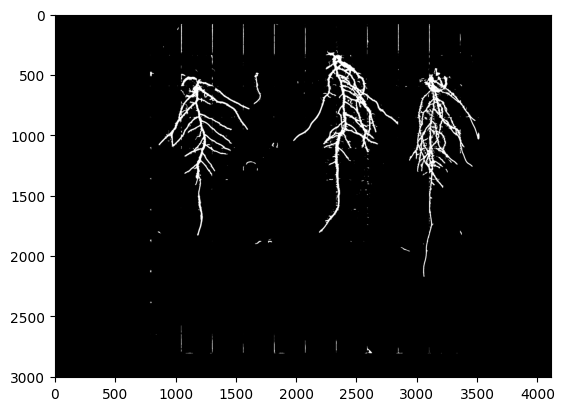

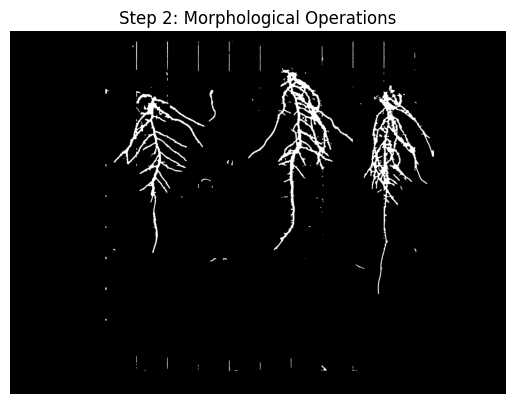

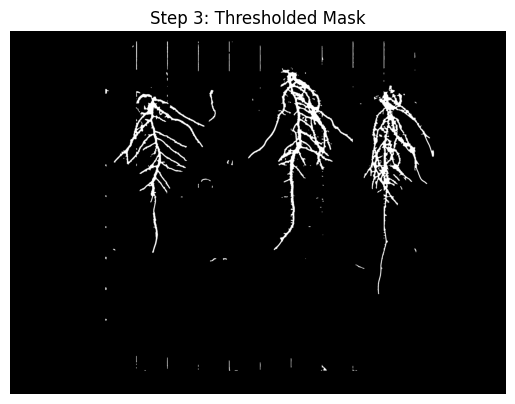

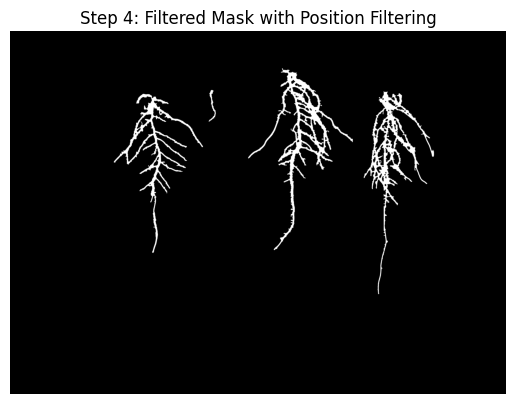

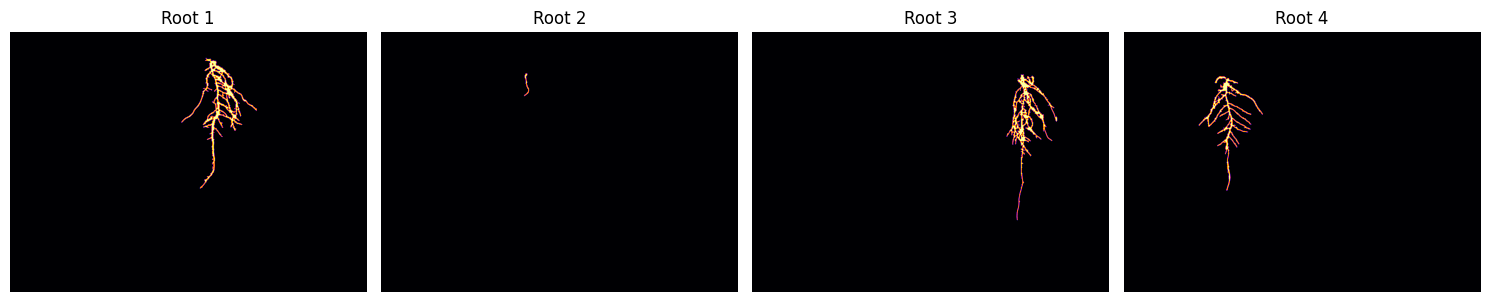

In [1]:
import cv2
import os
import numpy as np
import matplotlib.pyplot as plt

# Step 1: Load the predicted mask from Task 5
predicted_mask_path = "task5_test_image_prediction_artjom_234535.png"
binary_mask = cv2.imread(predicted_mask_path, cv2.IMREAD_GRAYSCALE)

# Ensure binary mask (0 or 255)
binary_mask[binary_mask > 0] = 255

plt.imshow(binary_mask, cmap="gray")

# Step 2: Apply morphological operations to clean the mask
kernel = np.ones((4, 4), np.uint8)
cleaned_mask = cv2.morphologyEx(binary_mask, cv2.MORPH_CLOSE, kernel, iterations=2)  # Close small gaps
cleaned_mask = cv2.morphologyEx(cleaned_mask, cv2.MORPH_OPEN, kernel, iterations=1)  # Remove small noise

plt.figure()
plt.title("Step 2: Morphological Operations")
plt.imshow(cleaned_mask, cmap="gray")
plt.axis("off")
plt.show()

# Step 3: Apply additional thresholding to enhance roots
_, thresholded_mask = cv2.threshold(cleaned_mask, 127, 255, cv2.THRESH_BINARY)

plt.figure()
plt.title("Step 3: Thresholded Mask")
plt.imshow(thresholded_mask, cmap="gray")
plt.axis("off")
plt.show()

# Step 4: Find connected components and filter
num_labels, labels, stats, centroids = cv2.connectedComponentsWithStats(thresholded_mask)

# Step 5: Filter objects based on area, aspect ratio, and position
min_root_area = 1500  # Minimum area to consider an object as a root
aspect_ratio_threshold = 1.7  # Minimum aspect ratio (length/width) for roots

y_threshold = 100  # Exclude components too close to the top

filtered_mask = np.zeros_like(binary_mask, dtype=np.uint8)

for label_idx in range(1, num_labels):  # Skip background (label 0)
    x, y, w, h, area = stats[label_idx, cv2.CC_STAT_LEFT], stats[label_idx, cv2.CC_STAT_TOP], \
                       stats[label_idx, cv2.CC_STAT_WIDTH], stats[label_idx, cv2.CC_STAT_HEIGHT], \
                       stats[label_idx, cv2.CC_STAT_AREA]

    # Calculate aspect ratio (length/width)
    aspect_ratio = max(w, h) / min(w, h) if min(w, h) > 0 else 0

    # Filter based on area, aspect ratio, and position
    if area >= min_root_area and aspect_ratio >= aspect_ratio_threshold:
        # Additional filter to remove components near the top boundary
        if y > y_threshold:  # Adjust this threshold as needed
            filtered_mask[labels == label_idx] = 255

# Apply small morphological operations to remove tiny noise
final_kernel = np.ones((3, 3), np.uint8)
filtered_mask = cv2.morphologyEx(filtered_mask, cv2.MORPH_OPEN, final_kernel, iterations=1)

plt.figure()
plt.title("Step 4: Filtered Mask with Position Filtering")
plt.imshow(filtered_mask, cmap="gray")
plt.axis("off")
plt.show()

# Step 6: Extract individual roots
num_labels_filtered, labels_filtered, stats_filtered, _ = cv2.connectedComponentsWithStats(filtered_mask)

individual_roots = []
for label_idx in range(1, num_labels_filtered):  # Skip background
    root_mask = np.zeros_like(filtered_mask, dtype=np.uint8)
    root_mask[labels_filtered == label_idx] = 255
    individual_roots.append(root_mask)

# Step 7: Visualize individual roots
fig, axes = plt.subplots(1, len(individual_roots), figsize=(15, 5))
for i, root_mask in enumerate(individual_roots):
    axes[i].imshow(root_mask, cmap="inferno")
    axes[i].axis("off")
    axes[i].set_title(f"Root {i+1}")
plt.tight_layout()
plt.show()

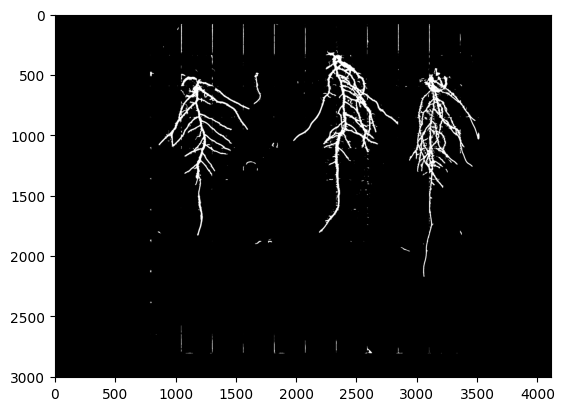

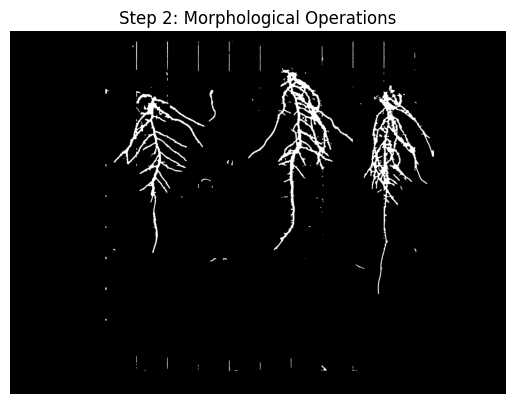

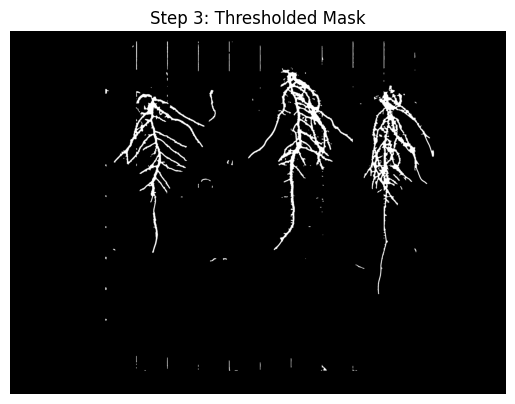

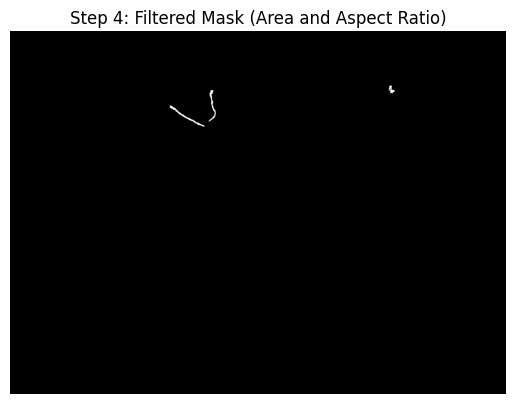

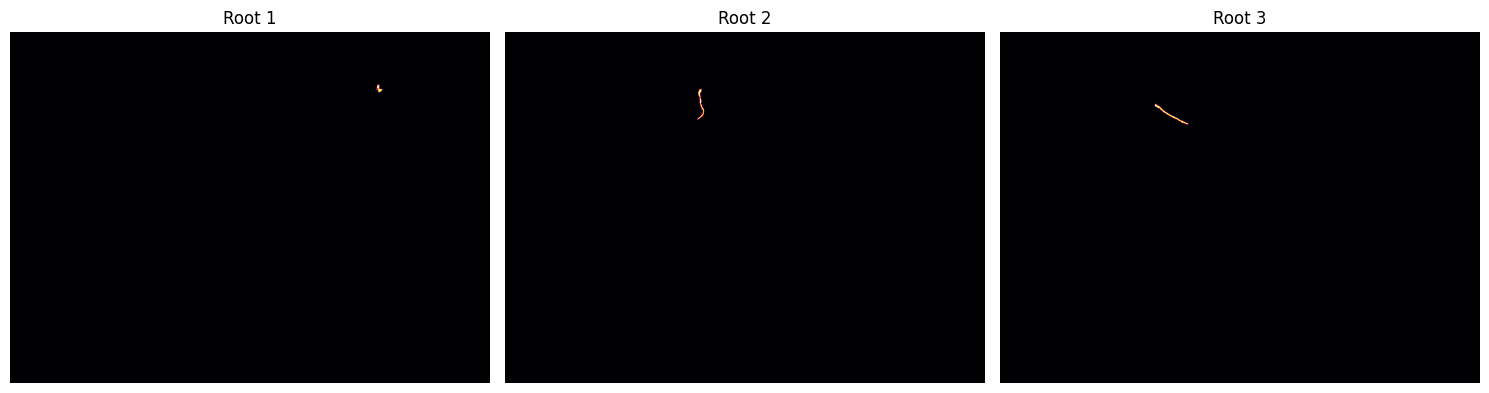

In [78]:
import cv2
import os
import numpy as np
import matplotlib.pyplot as plt

# Step 1: Load the predicted mask from Task 5
predicted_mask_path = "task5_test_image_prediction_artjom_234535.png"
binary_mask = cv2.imread(predicted_mask_path, cv2.IMREAD_GRAYSCALE)

# Ensure binary mask (0 or 255)
binary_mask[binary_mask > 0] = 255

plt.imshow(binary_mask, cmap="gray")

# Step 2: Apply morphological operations to clean the mask
kernel = np.ones((4, 4), np.uint8)
cleaned_mask = cv2.morphologyEx(binary_mask, cv2.MORPH_CLOSE, kernel, iterations=2)  # Close small gaps
cleaned_mask = cv2.morphologyEx(cleaned_mask, cv2.MORPH_OPEN, kernel, iterations=1)  # Remove small noise

plt.figure()
plt.title("Step 2: Morphological Operations")
plt.imshow(cleaned_mask, cmap="gray")
plt.axis("off")
plt.show()

# Step 3: Apply additional thresholding to enhance roots
_, thresholded_mask = cv2.threshold(cleaned_mask, 127, 255, cv2.THRESH_BINARY)

plt.figure()
plt.title("Step 3: Thresholded Mask")
plt.imshow(thresholded_mask, cmap="gray")
plt.axis("off")
plt.show()

# Step 4: Find connected components
num_labels, labels, stats, centroids = cv2.connectedComponentsWithStats(thresholded_mask)

# Step 5: Filter objects based on area and aspect ratio
min_root_area = 1000  # Reduced minimum area to include smaller components
max_root_area = 50000  # Keep maximum area constraint
aspect_ratio_min = 0.2  # Relax aspect ratio to include more shapes
aspect_ratio_max = 10.0  # Allow taller and thinner components

filtered_mask = np.zeros_like(binary_mask, dtype=np.uint8)

for label_idx in range(1, num_labels):  # Skip background (label 0)
    x, y, w, h, area = stats[label_idx, cv2.CC_STAT_LEFT], stats[label_idx, cv2.CC_STAT_TOP], \
                       stats[label_idx, cv2.CC_STAT_WIDTH], stats[label_idx, cv2.CC_STAT_HEIGHT], \
                       stats[label_idx, cv2.CC_STAT_AREA]

    # Calculate aspect ratio (length/width)
    aspect_ratio = max(w, h) / min(w, h) if min(w, h) > 0 else 0

    # Filter based on area and aspect ratio
    if min_root_area <= area <= max_root_area and aspect_ratio_min <= aspect_ratio <= aspect_ratio_max:
        # Ignore components near the top boundary
        if y > 50:  # Adjust threshold if needed
            filtered_mask[labels == label_idx] = 255

plt.figure()
plt.title("Step 4: Filtered Mask (Area and Aspect Ratio)")
plt.imshow(filtered_mask, cmap="gray")
plt.axis("off")
plt.show()

# Step 6: Extract individual roots
num_labels_filtered, labels_filtered, stats_filtered, _ = cv2.connectedComponentsWithStats(filtered_mask)

individual_roots = []
for label_idx in range(1, num_labels_filtered):  # Skip background
    root_mask = np.zeros_like(filtered_mask, dtype=np.uint8)
    root_mask[labels_filtered == label_idx] = 255
    individual_roots.append(root_mask)

# Step 7: Visualize individual roots
fig, axes = plt.subplots(1, len(individual_roots), figsize=(15, 5))
for i, root_mask in enumerate(individual_roots):
    axes[i].imshow(root_mask, cmap="inferno")
    axes[i].axis("off")
    axes[i].set_title(f"Root {i+1}")
plt.tight_layout()
plt.show()

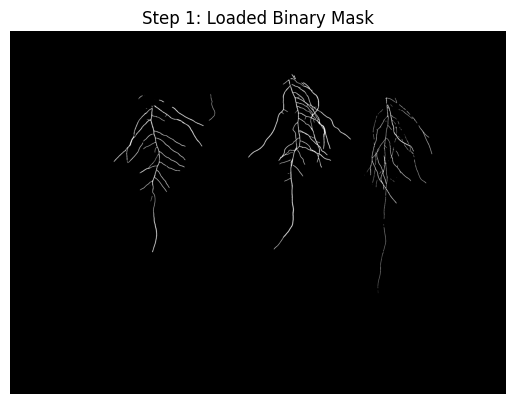

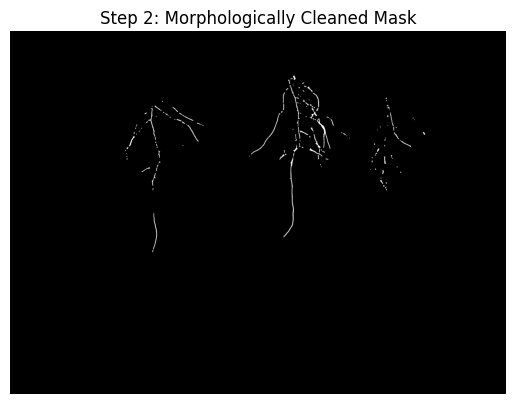

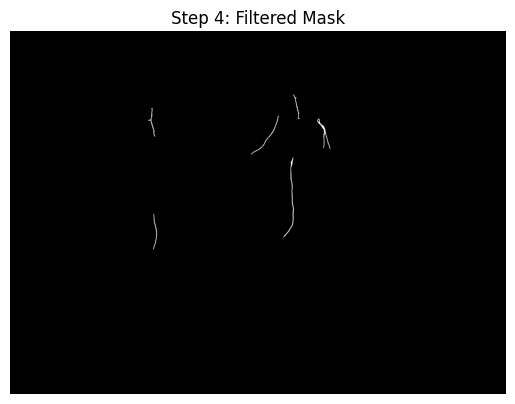

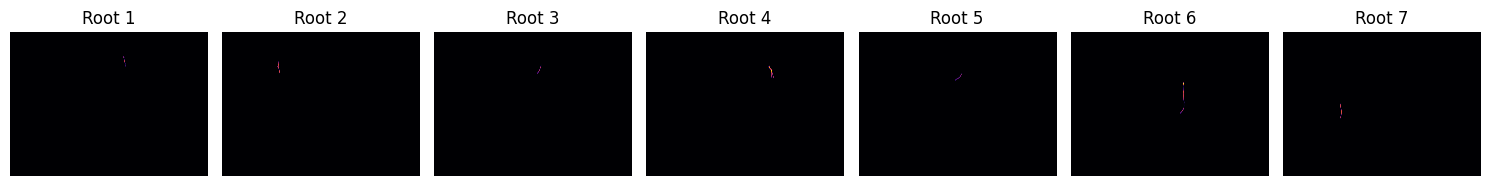

In [41]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Step 1: Load the predicted mask from Task 5
predicted_mask_path = "task5_test_image_prediction_artjom_234535.png"
predicted_mask = cv2.imread(predicted_mask_path, cv2.IMREAD_GRAYSCALE)

# Ensure binary mask
binary_mask = cv2.threshold(predicted_mask, 127, 255, cv2.THRESH_BINARY)[1]

plt.figure()
plt.title("Step 1: Loaded Binary Mask")
plt.imshow(binary_mask, cmap="gray")
plt.axis("off")
plt.show()

# Step 2: Apply morphological cleaning
kernel = np.ones((5, 5), np.uint8)
cleaned_mask = cv2.morphologyEx(binary_mask, cv2.MORPH_CLOSE, kernel)
cleaned_mask = cv2.morphologyEx(cleaned_mask, cv2.MORPH_OPEN, kernel)

plt.figure()
plt.title("Step 2: Morphologically Cleaned Mask")
plt.imshow(cleaned_mask, cmap="gray")
plt.axis("off")
plt.show()

# Step 3: Find connected components
num_labels, labels, stats, _ = cv2.connectedComponentsWithStats(cleaned_mask)

# Step 4: Filter components by area
min_area = 1200
max_area = 50000
filtered_mask = np.zeros_like(cleaned_mask)

for label in range(1, num_labels):
    area = stats[label, cv2.CC_STAT_AREA]
    if min_area <= area <= max_area:
        filtered_mask[labels == label] = 255

plt.figure()
plt.title("Step 4: Filtered Mask")
plt.imshow(filtered_mask, cmap="gray")
plt.axis("off")
plt.show()

# Step 5: Extract individual roots
individual_roots = []
num_labels_filtered, labels_filtered, stats_filtered, _ = cv2.connectedComponentsWithStats(filtered_mask)

for label in range(1, num_labels_filtered):
    root_mask = np.zeros_like(filtered_mask)
    root_mask[labels_filtered == label] = 255
    individual_roots.append(root_mask)

# Step 6: Visualize individual roots
fig, axes = plt.subplots(1, len(individual_roots), figsize=(15, 5))
for i, root_mask in enumerate(individual_roots):
    axes[i].imshow(root_mask, cmap="inferno")
    axes[i].axis("off")
    axes[i].set_title(f"Root {i+1}")
plt.tight_layout()
plt.show()

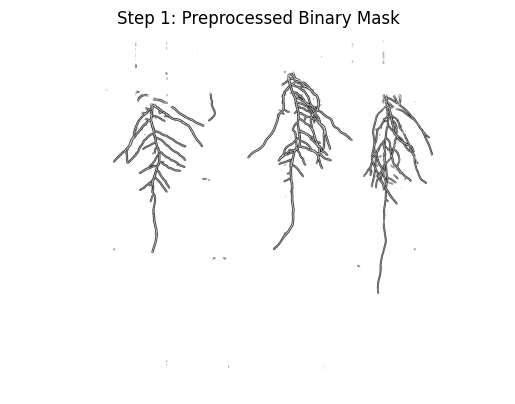

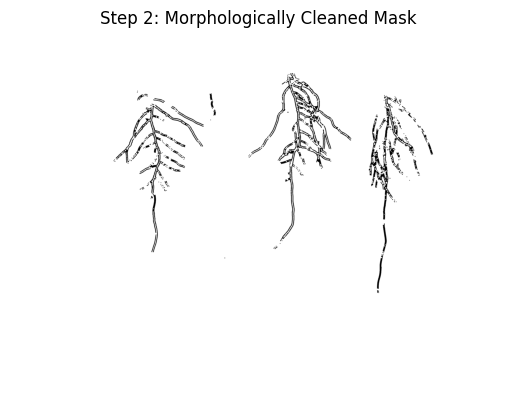

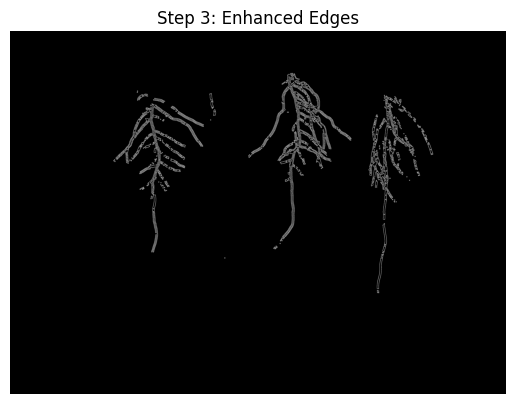

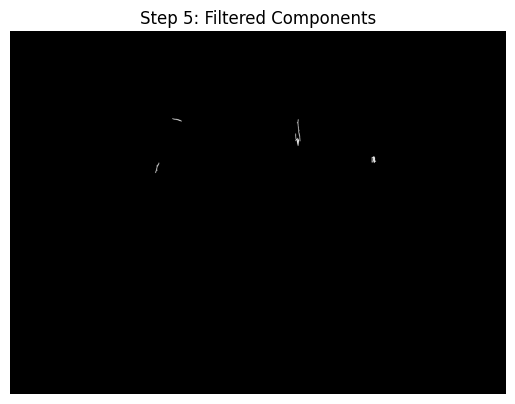

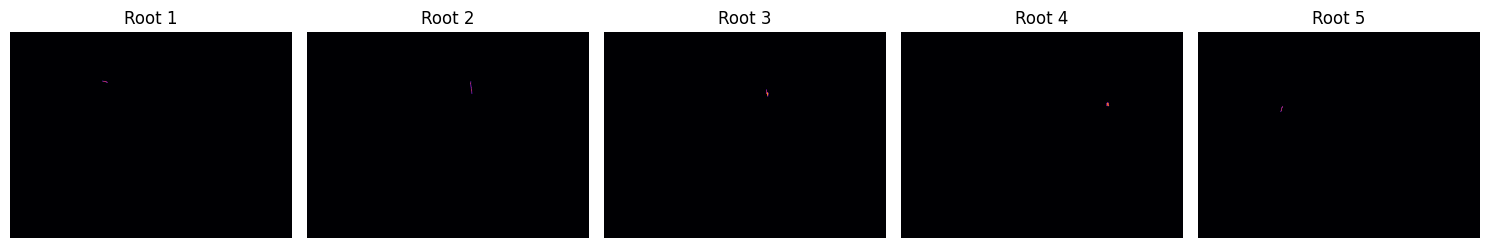

In [46]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Step 1: Load and preprocess the predicted mask
predicted_mask_path = "task5_test_image_prediction_artjom_234535.png"
predicted_mask = cv2.imread(predicted_mask_path, cv2.IMREAD_GRAYSCALE)

# Apply Gaussian blur to reduce noise
denosed_mask = cv2.GaussianBlur(predicted_mask, (5, 5), 0)

# Binarize the mask using adaptive thresholding
binary_mask = cv2.adaptiveThreshold(denosed_mask, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY, 11, 2)

plt.figure()
plt.title("Step 1: Preprocessed Binary Mask")
plt.imshow(binary_mask, cmap="gray")
plt.axis("off")
plt.show()

# Step 2: Apply morphological cleaning
kernel = np.ones((5, 5), np.uint8)
cleaned_mask = cv2.morphologyEx(binary_mask, cv2.MORPH_CLOSE, kernel)
cleaned_mask = cv2.morphologyEx(cleaned_mask, cv2.MORPH_OPEN, kernel)

plt.figure()
plt.title("Step 2: Morphologically Cleaned Mask")
plt.imshow(cleaned_mask, cmap="gray")
plt.axis("off")
plt.show()

# Step 3: Enhance edges using Sobel filter
sobelx = cv2.Sobel(cleaned_mask, cv2.CV_64F, 1, 0, ksize=3)
sobely = cv2.Sobel(cleaned_mask, cv2.CV_64F, 0, 1, ksize=3)
edges = cv2.magnitude(sobelx, sobely)
edges = np.uint8(np.clip(edges, 0, 255))

plt.figure()
plt.title("Step 3: Enhanced Edges")
plt.imshow(edges, cmap="gray")
plt.axis("off")
plt.show()

# Step 4: Detect connected components
num_labels, labels, stats, _ = cv2.connectedComponentsWithStats(cleaned_mask)

# Step 5: Filter connected components by size and shape
min_area = 500  # Reduced minimum area to capture smaller roots
max_area = 70000
filtered_mask = np.zeros_like(cleaned_mask)

for label_idx in range(1, num_labels):  # Skip background
    area = stats[label_idx, cv2.CC_STAT_AREA]
    if min_area <= area <= max_area:
        filtered_mask[labels == label_idx] = 255

plt.figure()
plt.title("Step 5: Filtered Components")
plt.imshow(filtered_mask, cmap="gray")
plt.axis("off")
plt.show()

# Step 6: Extract individual root masks
num_labels_filtered, labels_filtered, stats_filtered, _ = cv2.connectedComponentsWithStats(filtered_mask)
individual_roots = []

for label_idx in range(1, num_labels_filtered):
    root_mask = np.zeros_like(filtered_mask)
    root_mask[labels_filtered == label_idx] = 255
    individual_roots.append(root_mask)

# Ensure at least one root is found
if not individual_roots:
    print("No roots detected after filtering. Adjust parameters or preprocessing.")
    individual_roots = [filtered_mask]  # Use filtered mask as fallback

# Step 7: Visualize individual roots
fig, axes = plt.subplots(1, len(individual_roots), figsize=(15, 5))
for i, root_mask in enumerate(individual_roots):
    axes[i].imshow(root_mask, cmap="inferno")
    axes[i].axis("off")
    axes[i].set_title(f"Root {i+1}")
plt.tight_layout()
plt.show()

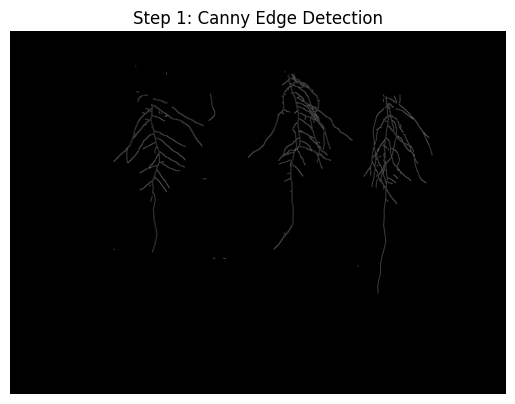

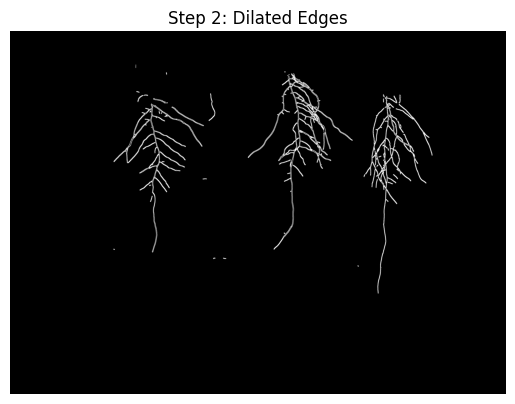

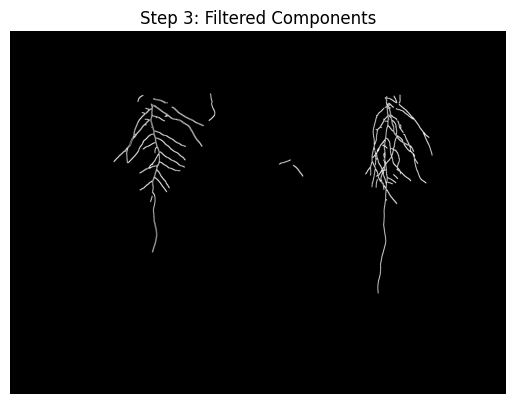

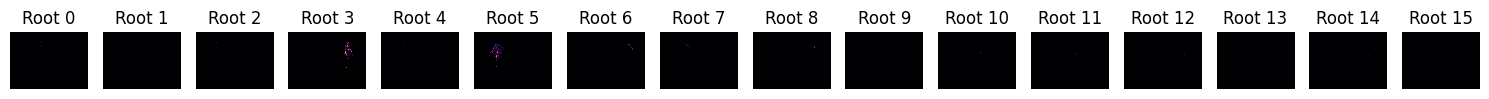

In [62]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Step 1: Edge detection using Canny
predicted_mask_path = "task5_test_image_prediction_artjom_234535.png"
predicted_mask = cv2.imread(predicted_mask_path, cv2.IMREAD_GRAYSCALE)

# Apply Gaussian blur to reduce noise
denosed_mask = cv2.GaussianBlur(predicted_mask, (5, 5), 0)

# Detect edges using Canny edge detector
edges = cv2.Canny(denosed_mask, threshold1=50, threshold2=150)

plt.figure()
plt.title("Step 1: Canny Edge Detection")
plt.imshow(edges, cmap="gray")
plt.axis("off")
plt.show()

# Step 2: Dilation to connect broken edges
kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (3, 3))
dilated_edges = cv2.dilate(edges, kernel, iterations=1)

plt.figure()
plt.title("Step 2: Dilated Edges")
plt.imshow(dilated_edges, cmap="gray")
plt.axis("off")
plt.show()

# Step 3: Find connected components
num_labels, labels, stats, centroids = cv2.connectedComponentsWithStats(dilated_edges, connectivity=8)

# Filter components by size and aspect ratio
min_area = 300
max_area = 50000
filtered_mask = np.zeros_like(dilated_edges)

for label_idx in range(1, num_labels):  # Skip background
    area = stats[label_idx, cv2.CC_STAT_AREA]
    x, y, w, h = stats[label_idx, cv2.CC_STAT_LEFT], stats[label_idx, cv2.CC_STAT_TOP], \
                 stats[label_idx, cv2.CC_STAT_WIDTH], stats[label_idx, cv2.CC_STAT_HEIGHT]

    aspect_ratio = w / h if h > 0 else 0
    if min_area <= area <= max_area and 0.1 <= aspect_ratio <= 10.0:
        filtered_mask[labels == label_idx] = 255

plt.figure()
plt.title("Step 3: Filtered Components")
plt.imshow(filtered_mask, cmap="gray")
plt.axis("off")
plt.show()

# Step 4: Extract individual root masks
num_labels_filtered, labels_filtered, stats_filtered, _ = cv2.connectedComponentsWithStats(filtered_mask)
individual_roots = []

for label_idx in range(1, num_labels_filtered):
    root_mask = np.zeros_like(filtered_mask)
    root_mask[labels_filtered == label_idx] = 255
    individual_roots.append(root_mask)

# Step 5: Visualize individual roots
fig, axes = plt.subplots(1, len(individual_roots), figsize=(15, 5))
for i, root_mask in enumerate(individual_roots):
    axes[i].imshow(root_mask, cmap="inferno")
    axes[i].axis("off")
    axes[i].set_title(f"Root {i}")
plt.tight_layout()
plt.show()


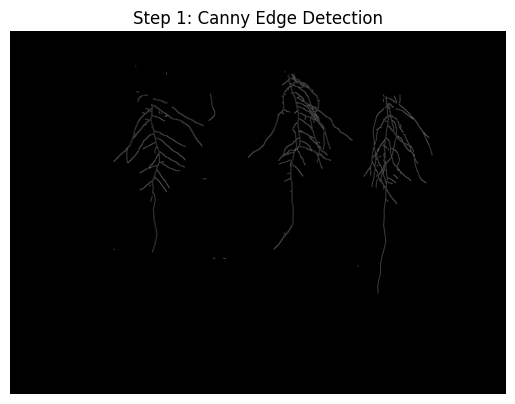

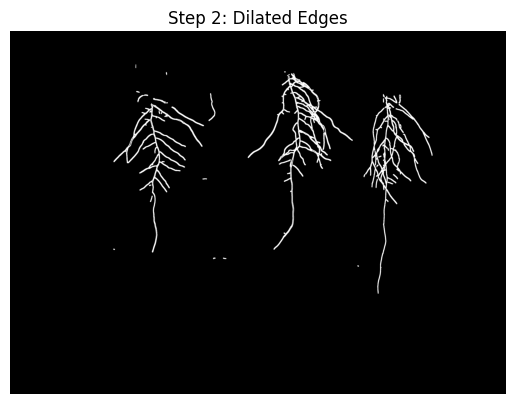

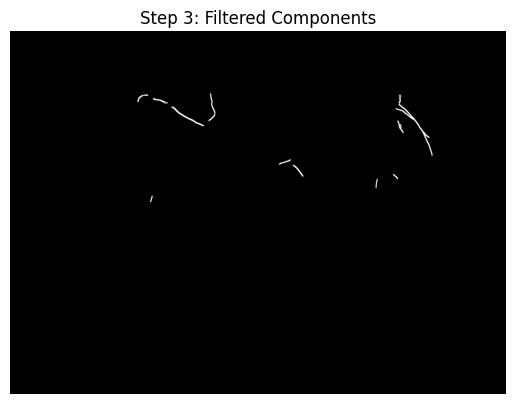

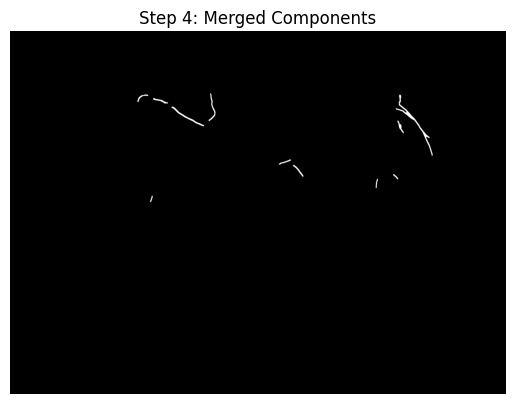

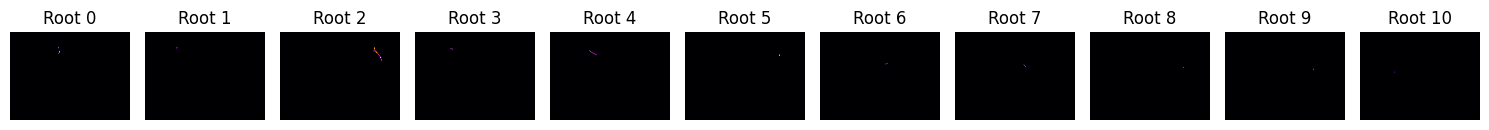

In [63]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Step 1: Edge detection using Canny
predicted_mask_path = "task5_test_image_prediction_artjom_234535.png"
predicted_mask = cv2.imread(predicted_mask_path, cv2.IMREAD_GRAYSCALE)

# Apply Gaussian blur to reduce noise
denosed_mask = cv2.GaussianBlur(predicted_mask, (5, 5), 0)

# Detect edges using Canny edge detector
edges = cv2.Canny(denosed_mask, threshold1=50, threshold2=150)

plt.figure()
plt.title("Step 1: Canny Edge Detection")
plt.imshow(edges, cmap="gray")
plt.axis("off")
plt.show()

# Step 2: Dilation to connect broken edges
kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (3, 3))
dilated_edges = cv2.dilate(edges, kernel, iterations=2)  # Increased iterations for better connectivity

plt.figure()
plt.title("Step 2: Dilated Edges")
plt.imshow(dilated_edges, cmap="gray")
plt.axis("off")
plt.show()

# Step 3: Find connected components
num_labels, labels, stats, centroids = cv2.connectedComponentsWithStats(dilated_edges, connectivity=8)

# Filter components by size and aspect ratio
min_area = 500  # Increased minimum area to filter smaller noise
max_area = 50000
filtered_mask = np.zeros_like(dilated_edges)

for label_idx in range(1, num_labels):  # Skip background
    area = stats[label_idx, cv2.CC_STAT_AREA]
    x, y, w, h = stats[label_idx, cv2.CC_STAT_LEFT], stats[label_idx, cv2.CC_STAT_TOP], \
                 stats[label_idx, cv2.CC_STAT_WIDTH], stats[label_idx, cv2.CC_STAT_HEIGHT]

    aspect_ratio = w / h if h > 0 else 0
    if min_area <= area <= max_area and 0.2 <= aspect_ratio <= 5.0:  # Adjusted aspect ratio
        filtered_mask[labels == label_idx] = 255

plt.figure()
plt.title("Step 3: Filtered Components")
plt.imshow(filtered_mask, cmap="gray")
plt.axis("off")
plt.show()

# Step 4: Merge close components to reduce over-segmentation
kernel_merge = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (10, 10))
merged_mask = cv2.morphologyEx(filtered_mask, cv2.MORPH_CLOSE, kernel_merge)

plt.figure()
plt.title("Step 4: Merged Components")
plt.imshow(merged_mask, cmap="gray")
plt.axis("off")
plt.show()

# Step 5: Extract individual root masks
num_labels_merged, labels_merged, stats_merged, _ = cv2.connectedComponentsWithStats(merged_mask)
individual_roots = []

for label_idx in range(1, num_labels_merged):
    root_mask = np.zeros_like(merged_mask)
    root_mask[labels_merged == label_idx] = 255
    individual_roots.append(root_mask)

# Step 6: Visualize individual roots
fig, axes = plt.subplots(1, len(individual_roots), figsize=(15, 5))
for i, root_mask in enumerate(individual_roots):
    axes[i].imshow(root_mask, cmap="inferno")
    axes[i].axis("off")
    axes[i].set_title(f"Root {i}")
plt.tight_layout()
plt.show()

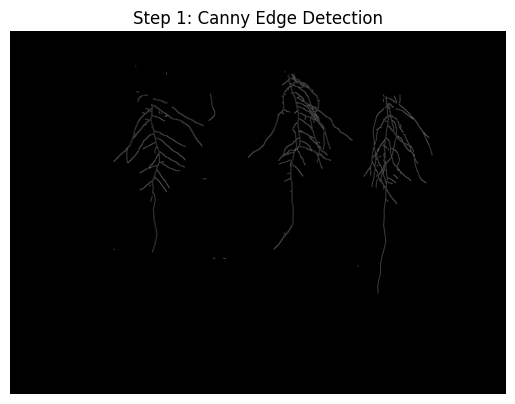

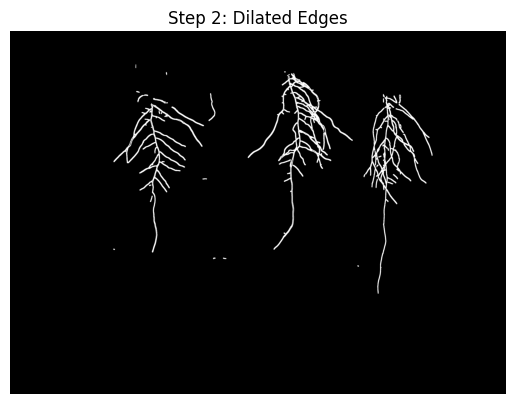

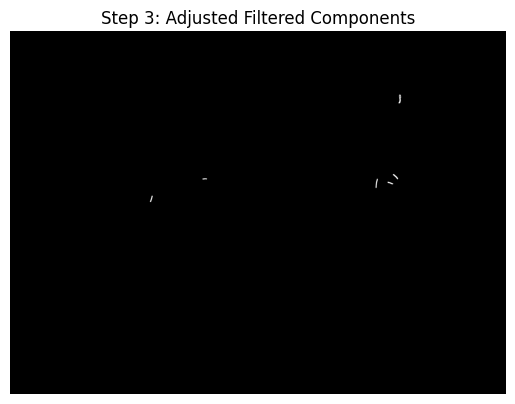

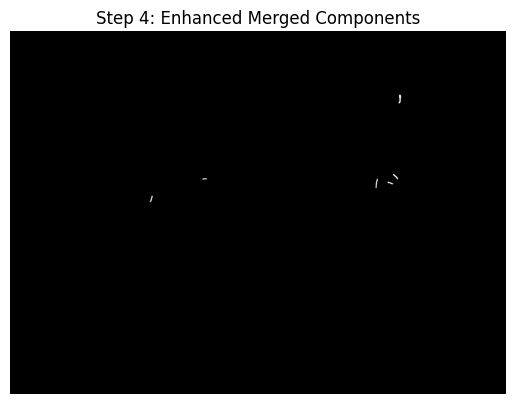

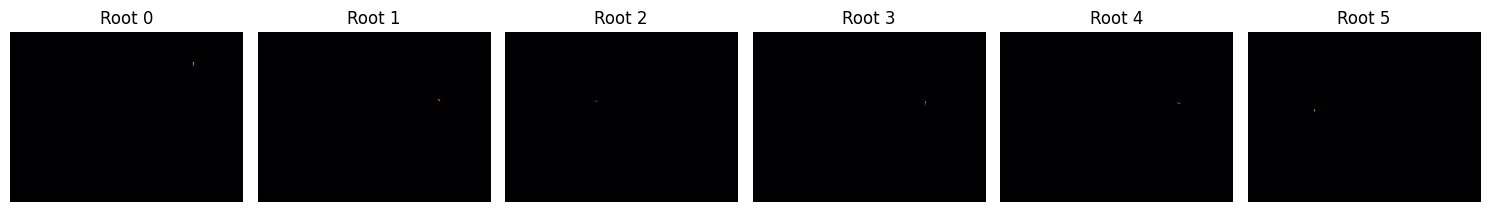

In [65]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Step 1: Edge detection using Canny
predicted_mask_path = "task5_test_image_prediction_artjom_234535.png"
predicted_mask = cv2.imread(predicted_mask_path, cv2.IMREAD_GRAYSCALE)

# Apply Gaussian blur to reduce noise
denosed_mask = cv2.GaussianBlur(predicted_mask, (5, 5), 0)

# Detect edges using Canny edge detector
edges = cv2.Canny(denosed_mask, threshold1=50, threshold2=150)

plt.figure()
plt.title("Step 1: Canny Edge Detection")
plt.imshow(edges, cmap="gray")
plt.axis("off")
plt.show()

# Step 2: Dilation to connect broken edges
kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (3, 3))
dilated_edges = cv2.dilate(edges, kernel, iterations=2)  # Increased iterations for better connectivity

plt.figure()
plt.title("Step 2: Dilated Edges")
plt.imshow(dilated_edges, cmap="gray")
plt.axis("off")
plt.show()

# Step 3: Adjusted connected components filtering
num_labels, labels, stats, centroids = cv2.connectedComponentsWithStats(dilated_edges, connectivity=8)

# Filter components by size and aspect ratio
min_area = 300  # Reduced minimum area to capture smaller roots
max_area = 70000
filtered_mask = np.zeros_like(dilated_edges)

for label_idx in range(1, num_labels):  # Skip background
    area = stats[label_idx, cv2.CC_STAT_AREA]
    x, y, w, h = stats[label_idx, cv2.CC_STAT_LEFT], stats[label_idx, cv2.CC_STAT_TOP], \
                 stats[label_idx, cv2.CC_STAT_WIDTH], stats[label_idx, cv2.CC_STAT_HEIGHT]

    aspect_ratio = w / h if h > 0 else 0
    perimeter = 2 * (w + h)
    compactness = (4 * np.pi * area) / (perimeter ** 2) if perimeter > 0 else 0

    if min_area <= area <= max_area and 0.1 <= aspect_ratio <= 8.0 and compactness > 0.2:
        filtered_mask[labels == label_idx] = 255

plt.figure()
plt.title("Step 3: Adjusted Filtered Components")
plt.imshow(filtered_mask, cmap="gray")
plt.axis("off")
plt.show()

# Step 4: Enhanced merging of components
kernel_merge = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (15, 15))  # Increased kernel size
merged_mask = cv2.morphologyEx(filtered_mask, cv2.MORPH_CLOSE, kernel_merge)

plt.figure()
plt.title("Step 4: Enhanced Merged Components")
plt.imshow(merged_mask, cmap="gray")
plt.axis("off")
plt.show()

# Step 5: Extract individual root masks
num_labels_merged, labels_merged, stats_merged, _ = cv2.connectedComponentsWithStats(merged_mask)
individual_roots = []

for label_idx in range(1, num_labels_merged):
    root_mask = np.zeros_like(merged_mask)
    root_mask[labels_merged == label_idx] = 255
    individual_roots.append(root_mask)

# Step 6: Visualize individual roots
fig, axes = plt.subplots(1, len(individual_roots), figsize=(15, 5))
for i, root_mask in enumerate(individual_roots):
    axes[i].imshow(root_mask, cmap="inferno")
    axes[i].axis("off")
    axes[i].set_title(f"Root {i}")
plt.tight_layout()
plt.show()



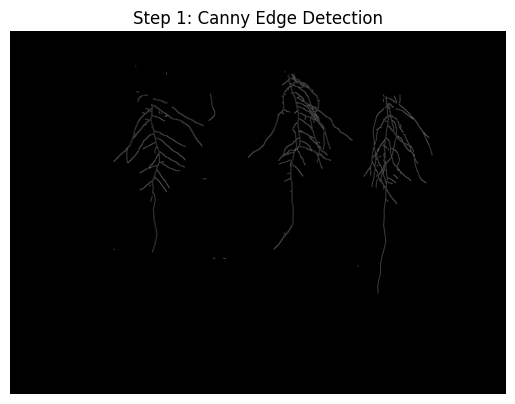

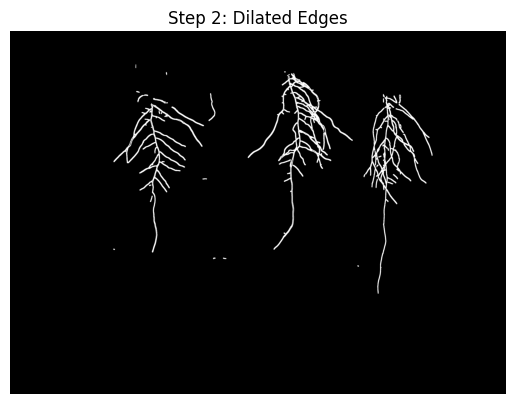

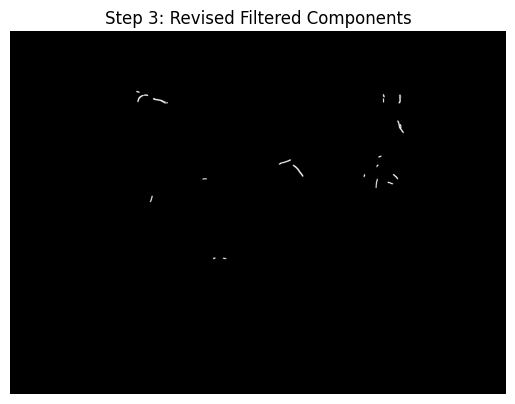

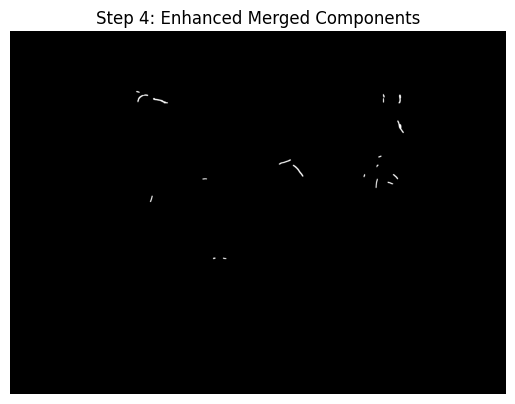

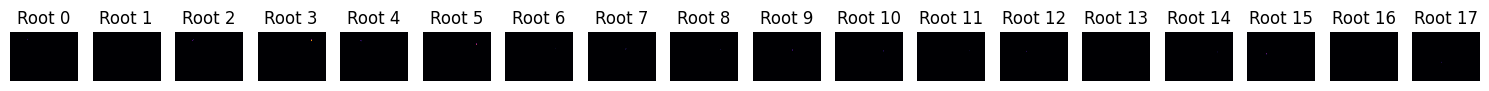

In [72]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Step 1: Edge detection using Canny
predicted_mask_path = "task5_test_image_prediction_artjom_234535.png"
predicted_mask = cv2.imread(predicted_mask_path, cv2.IMREAD_GRAYSCALE)

# Apply Gaussian blur to reduce noise
denosed_mask = cv2.GaussianBlur(predicted_mask, (5, 5), 0)

# Detect edges using Canny edge detector
edges = cv2.Canny(denosed_mask, threshold1=50, threshold2=150)

plt.figure()
plt.title("Step 1: Canny Edge Detection")
plt.imshow(edges, cmap="gray")
plt.axis("off")
plt.show()

# Step 2: Dilation to connect broken edges
kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (3, 3))
dilated_edges = cv2.dilate(edges, kernel, iterations=2)  # Increased iterations for better connectivity

plt.figure()
plt.title("Step 2: Dilated Edges")
plt.imshow(dilated_edges, cmap="gray")
plt.axis("off")
plt.show()

# Step 3: Revised connected components filtering
num_labels, labels, stats, centroids = cv2.connectedComponentsWithStats(dilated_edges, connectivity=8)

# Filter components by size and aspect ratio
min_area = 200  # Further reduced minimum area to capture small roots
max_area = 100000
filtered_mask = np.zeros_like(dilated_edges)

for label_idx in range(1, num_labels):  # Skip background
    area = stats[label_idx, cv2.CC_STAT_AREA]
    x, y, w, h = stats[label_idx, cv2.CC_STAT_LEFT], stats[label_idx, cv2.CC_STAT_TOP], \
                 stats[label_idx, cv2.CC_STAT_WIDTH], stats[label_idx, cv2.CC_STAT_HEIGHT]

    aspect_ratio = w / h if h > 0 else 0
    perimeter = 2 * (w + h)
    compactness = (4 * np.pi * area) / (perimeter ** 2) if perimeter > 0 else 0

    if min_area <= area <= max_area and 0.1 <= aspect_ratio <= 10.0 and compactness > 0.1:
        filtered_mask[labels == label_idx] = 255

plt.figure()
plt.title("Step 3: Revised Filtered Components")
plt.imshow(filtered_mask, cmap="gray")
plt.axis("off")
plt.show()

# Step 4: Enhanced merging of components
kernel_merge = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (15, 15))  # Increased kernel size
merged_mask = cv2.morphologyEx(filtered_mask, cv2.MORPH_CLOSE, kernel_merge)

plt.figure()
plt.title("Step 4: Enhanced Merged Components")
plt.imshow(merged_mask, cmap="gray")
plt.axis("off")
plt.show()

# Step 5: Extract individual root masks
num_labels_merged, labels_merged, stats_merged, _ = cv2.connectedComponentsWithStats(merged_mask)
individual_roots = []

for label_idx in range(1, num_labels_merged):
    root_mask = np.zeros_like(merged_mask)
    root_mask[labels_merged == label_idx] = 255
    individual_roots.append(root_mask)

# Step 6: Visualize individual roots
fig, axes = plt.subplots(1, len(individual_roots), figsize=(15, 5))
for i, root_mask in enumerate(individual_roots):
    axes[i].imshow(root_mask, cmap="inferno")
    axes[i].axis("off")
    axes[i].set_title(f"Root {i}")
plt.tight_layout()
plt.show()

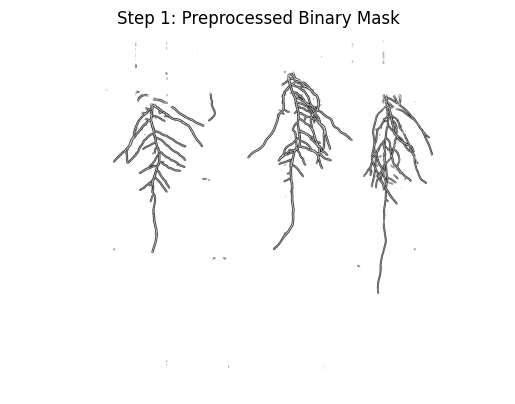

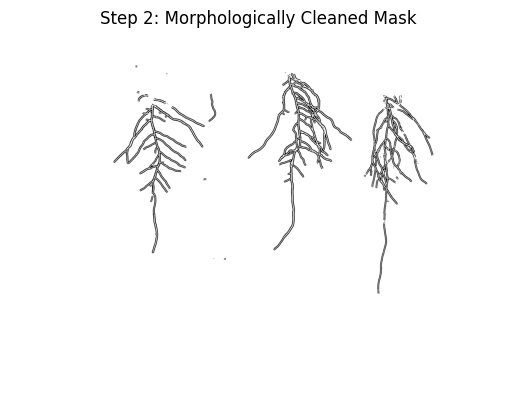

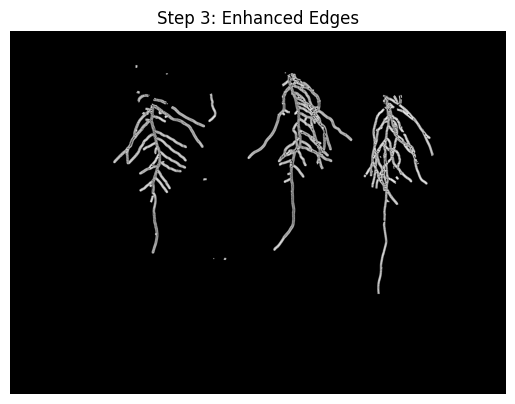

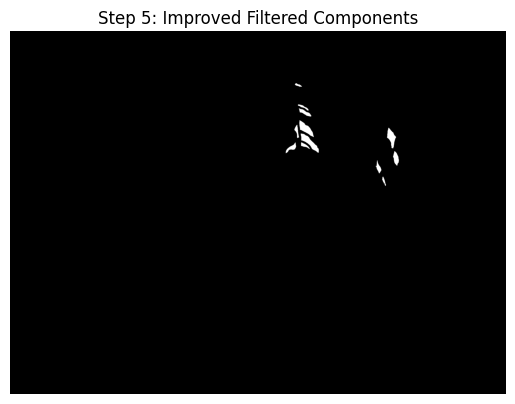

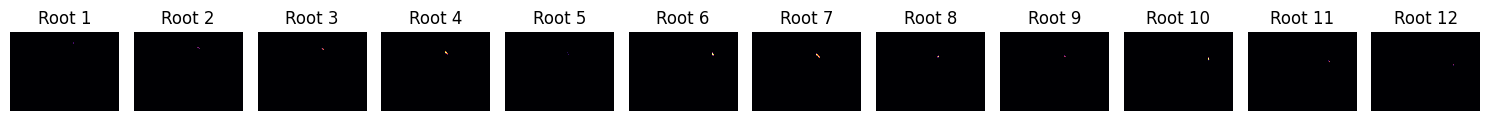

In [53]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Step 1: Load and preprocess the predicted mask
predicted_mask_path = "task5_test_image_prediction_artjom_234535.png"
predicted_mask = cv2.imread(predicted_mask_path, cv2.IMREAD_GRAYSCALE)

# Apply Gaussian blur to reduce noise
denosed_mask = cv2.GaussianBlur(predicted_mask, (5, 5), 0)

# Binarize the mask using adaptive thresholding
binary_mask = cv2.adaptiveThreshold(denosed_mask, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY, 11, 2)

plt.figure()
plt.title("Step 1: Preprocessed Binary Mask")
plt.imshow(binary_mask, cmap="gray")
plt.axis("off")
plt.show()

# Step 2: Morphological cleaning inspired by traditional approaches
kernel = np.ones((4, 4), np.uint8)
cleaned_mask = cv2.morphologyEx(binary_mask, cv2.MORPH_CLOSE, kernel, iterations=1)
kernel_small = np.ones((2, 2), np.uint8)
cleaned_mask = cv2.morphologyEx(cleaned_mask, cv2.MORPH_OPEN, kernel_small, iterations=2)

plt.figure()
plt.title("Step 2: Morphologically Cleaned Mask")
plt.imshow(cleaned_mask, cmap="gray")
plt.axis("off")
plt.show()

# Step 3: Detect edges using Sobel and refine with dilation
sobelx = cv2.Sobel(cleaned_mask, cv2.CV_64F, 1, 0, ksize=3)
sobely = cv2.Sobel(cleaned_mask, cv2.CV_64F, 0, 1, ksize=3)
edges = cv2.magnitude(sobelx, sobely)
edges = np.uint8(np.clip(edges, 0, 255))
edges_dilated = cv2.dilate(edges, kernel_small, iterations=1)

plt.figure()
plt.title("Step 3: Enhanced Edges")
plt.imshow(edges_dilated, cmap="gray")
plt.axis("off")
plt.show()

# Step 4: Detect connected components
num_labels, labels, stats, _ = cv2.connectedComponentsWithStats(cleaned_mask)

# Step 5: Filter connected components by size and circularity
min_area = 700
max_area = 50000
filtered_mask = np.zeros_like(cleaned_mask)

for label_idx in range(1, num_labels):  # Skip background
    area = stats[label_idx, cv2.CC_STAT_AREA]
    x, y, w, h = stats[label_idx, cv2.CC_STAT_LEFT], stats[label_idx, cv2.CC_STAT_TOP], \
                 stats[label_idx, cv2.CC_STAT_WIDTH], stats[label_idx, cv2.CC_STAT_HEIGHT]

    aspect_ratio = w / h if h > 0 else 0
    if min_area <= area <= max_area and 0.2 <= aspect_ratio <= 5.0:  # Allow wide range of shapes
        filtered_mask[labels == label_idx] = 255

plt.figure()
plt.title("Step 5: Improved Filtered Components")
plt.imshow(filtered_mask, cmap="gray")
plt.axis("off")
plt.show()

# Step 6: Extract individual root masks
num_labels_filtered, labels_filtered, stats_filtered, _ = cv2.connectedComponentsWithStats(filtered_mask)
individual_roots = []

for label_idx in range(1, num_labels_filtered):
    root_mask = np.zeros_like(filtered_mask)
    root_mask[labels_filtered == label_idx] = 255
    individual_roots.append(root_mask)

# Step 7: Ensure roots and visualize
if not individual_roots:
    print("No roots detected after filtering. Using fallback mask.")
    individual_roots = [filtered_mask]

fig, axes = plt.subplots(1, len(individual_roots), figsize=(15, 5))
for i, root_mask in enumerate(individual_roots):
    axes[i].imshow(root_mask, cmap="inferno")
    axes[i].axis("off")
    axes[i].set_title(f"Root {i+1}")
plt.tight_layout()
plt.show()

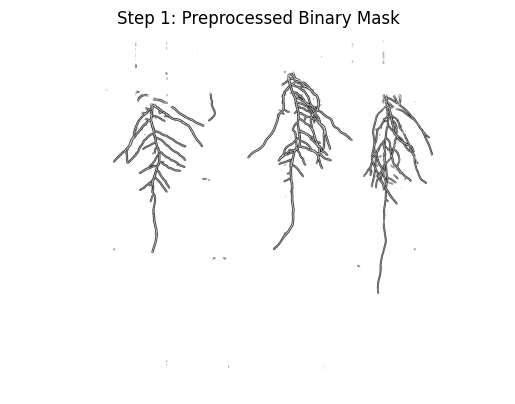

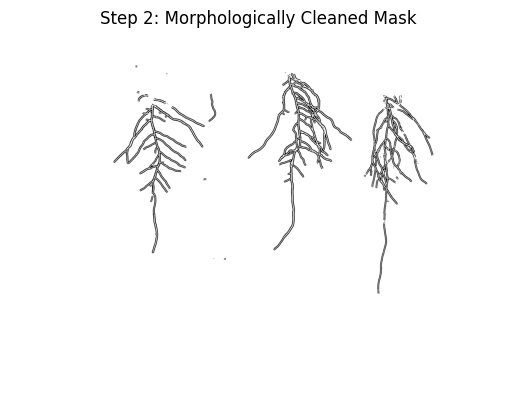

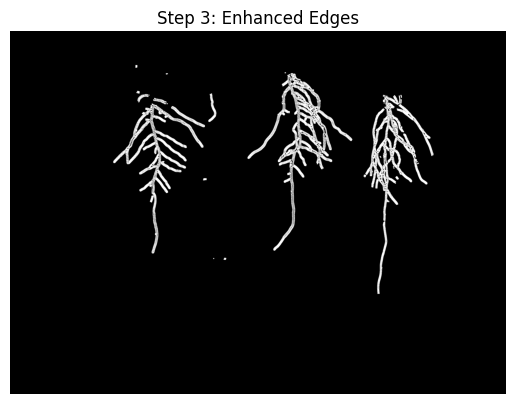

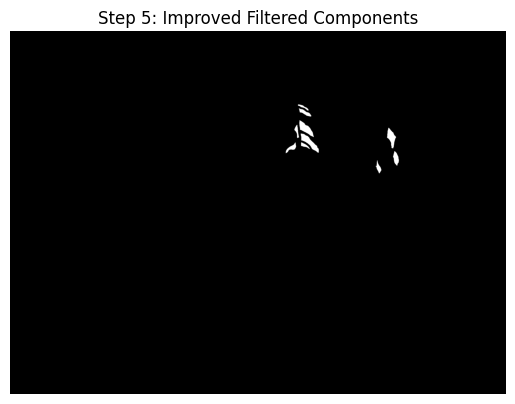

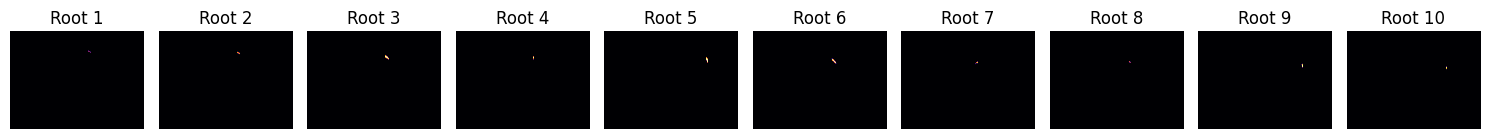

In [73]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Step 1: Load and preprocess the predicted mask
predicted_mask_path = "task5_test_image_prediction_artjom_234535.png"
predicted_mask = cv2.imread(predicted_mask_path, cv2.IMREAD_GRAYSCALE)

# Apply Gaussian blur to reduce noise
denosed_mask = cv2.GaussianBlur(predicted_mask, (5, 5), 0)

# Binarize the mask using adaptive thresholding
binary_mask = cv2.adaptiveThreshold(denosed_mask, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY, 11, 2)

plt.figure()
plt.title("Step 1: Preprocessed Binary Mask")
plt.imshow(binary_mask, cmap="gray")
plt.axis("off")
plt.show()

# Step 2: Morphological cleaning inspired by traditional approaches
kernel = np.ones((4, 4), np.uint8)
cleaned_mask = cv2.morphologyEx(binary_mask, cv2.MORPH_CLOSE, kernel, iterations=1)
kernel_small = np.ones((2, 2), np.uint8)
cleaned_mask = cv2.morphologyEx(cleaned_mask, cv2.MORPH_OPEN, kernel_small, iterations=2)

plt.figure()
plt.title("Step 2: Morphologically Cleaned Mask")
plt.imshow(cleaned_mask, cmap="gray")
plt.axis("off")
plt.show()

# Step 3: Detect edges using Sobel and refine with dilation
sobelx = cv2.Sobel(cleaned_mask, cv2.CV_64F, 1, 0, ksize=3)
sobely = cv2.Sobel(cleaned_mask, cv2.CV_64F, 0, 1, ksize=3)
edges = cv2.magnitude(sobelx, sobely)
edges = np.uint8(np.clip(edges, 0, 255))
kernel_edges = np.ones((3, 3), np.uint8)
edges_dilated = cv2.dilate(edges, kernel_edges, iterations=1)

plt.figure()
plt.title("Step 3: Enhanced Edges")
plt.imshow(edges_dilated, cmap="gray")
plt.axis("off")
plt.show()

# Step 4: Detect connected components
num_labels, labels, stats, _ = cv2.connectedComponentsWithStats(cleaned_mask)

# Step 5: Filter connected components by size and circularity
min_area = 1000
max_area = 60000
filtered_mask = np.zeros_like(cleaned_mask)

for label_idx in range(1, num_labels):  # Skip background
    area = stats[label_idx, cv2.CC_STAT_AREA]
    x, y, w, h = stats[label_idx, cv2.CC_STAT_LEFT], stats[label_idx, cv2.CC_STAT_TOP], \
                 stats[label_idx, cv2.CC_STAT_WIDTH], stats[label_idx, cv2.CC_STAT_HEIGHT]

    aspect_ratio = w / h if h > 0 else 0
    if min_area <= area <= max_area and 0.2 <= aspect_ratio <= 5.0:  # Allow wide range of shapes
        filtered_mask[labels == label_idx] = 255

plt.figure()
plt.title("Step 5: Improved Filtered Components")
plt.imshow(filtered_mask, cmap="gray")
plt.axis("off")
plt.show()

# Step 6: Extract individual root masks
num_labels_filtered, labels_filtered, stats_filtered, _ = cv2.connectedComponentsWithStats(filtered_mask)
individual_roots = []

for label_idx in range(1, num_labels_filtered):
    root_mask = np.zeros_like(filtered_mask)
    root_mask[labels_filtered == label_idx] = 255
    individual_roots.append(root_mask)

# Step 7: Ensure roots and visualize
if not individual_roots:
    print("No roots detected after filtering. Using fallback mask.")
    individual_roots = [filtered_mask]

fig, axes = plt.subplots(1, len(individual_roots), figsize=(15, 5))
for i, root_mask in enumerate(individual_roots):
    axes[i].imshow(root_mask, cmap="inferno")
    axes[i].axis("off")
    axes[i].set_title(f"Root {i+1}")
plt.tight_layout()
plt.show()

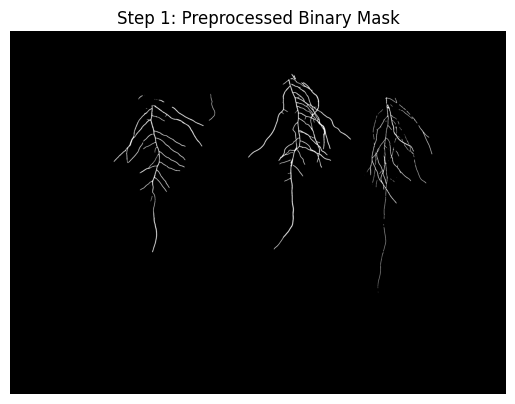

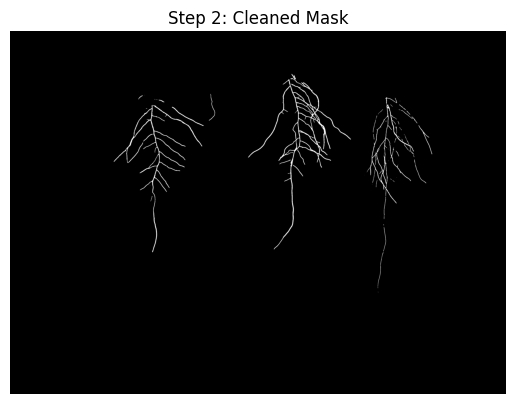

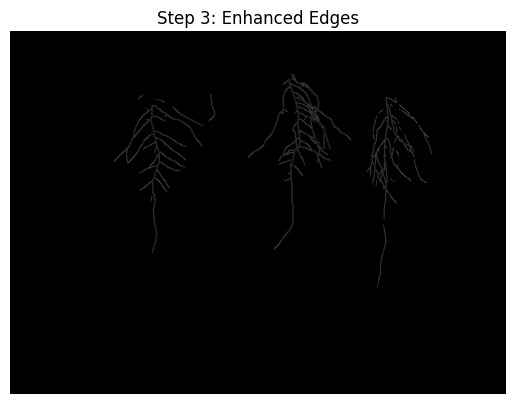

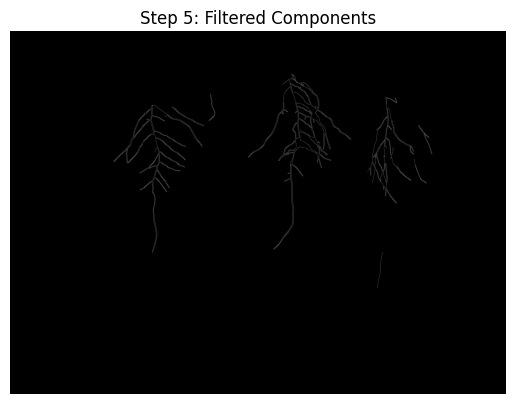

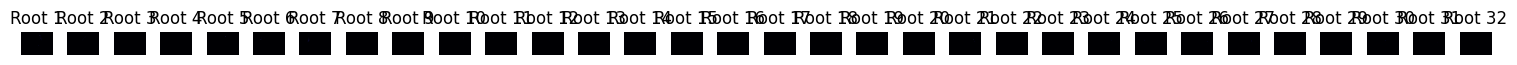

In [47]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Step 1: Load and preprocess the predicted mask
predicted_mask_path = "task5_test_image_prediction_artjom_234535.png"
predicted_mask = cv2.imread(predicted_mask_path, cv2.IMREAD_GRAYSCALE)

# Apply Gaussian blur to reduce noise
denosed_mask = cv2.GaussianBlur(predicted_mask, (5, 5), 0)

# Binarize the mask using a global threshold for consistency
_, binary_mask = cv2.threshold(denosed_mask, 100, 255, cv2.THRESH_BINARY)

plt.figure()
plt.title("Step 1: Preprocessed Binary Mask")
plt.imshow(binary_mask, cmap="gray")
plt.axis("off")
plt.show()

# Step 2: Apply minimal morphological cleaning to preserve root structure
kernel = np.ones((3, 3), np.uint8)
cleaned_mask = cv2.morphologyEx(binary_mask, cv2.MORPH_CLOSE, kernel, iterations=1)

plt.figure()
plt.title("Step 2: Cleaned Mask")
plt.imshow(cleaned_mask, cmap="gray")
plt.axis("off")
plt.show()

# Step 3: Enhance edges using Canny for finer structure detection
edges = cv2.Canny(cleaned_mask, 50, 150)

plt.figure()
plt.title("Step 3: Enhanced Edges")
plt.imshow(edges, cmap="gray")
plt.axis("off")
plt.show()

# Step 4: Detect connected components
num_labels, labels, stats, _ = cv2.connectedComponentsWithStats(edges)

# Step 5: Filter connected components by size
min_area = 300  # Smaller area to capture thin roots
max_area = 50000
filtered_mask = np.zeros_like(edges)

for label_idx in range(1, num_labels):  # Skip background
    area = stats[label_idx, cv2.CC_STAT_AREA]
    if min_area <= area <= max_area:
        filtered_mask[labels == label_idx] = 255

plt.figure()
plt.title("Step 5: Filtered Components")
plt.imshow(filtered_mask, cmap="gray")
plt.axis("off")
plt.show()

# Step 6: Extract individual root masks
num_labels_filtered, labels_filtered, stats_filtered, _ = cv2.connectedComponentsWithStats(filtered_mask)
individual_roots = []

for label_idx in range(1, num_labels_filtered):
    root_mask = np.zeros_like(filtered_mask)
    root_mask[labels_filtered == label_idx] = 255
    individual_roots.append(root_mask)

# Ensure at least one root is found
if not individual_roots:
    print("No roots detected after filtering. Adjust parameters or preprocessing.")
    individual_roots = [filtered_mask]  # Use filtered mask as fallback

# Step 7: Visualize individual roots
fig, axes = plt.subplots(1, len(individual_roots), figsize=(15, 5))
for i, root_mask in enumerate(individual_roots):
    axes[i].imshow(root_mask, cmap="inferno")
    axes[i].axis("off")
    axes[i].set_title(f"Root {i+1}")
plt.tight_layout()
plt.show()

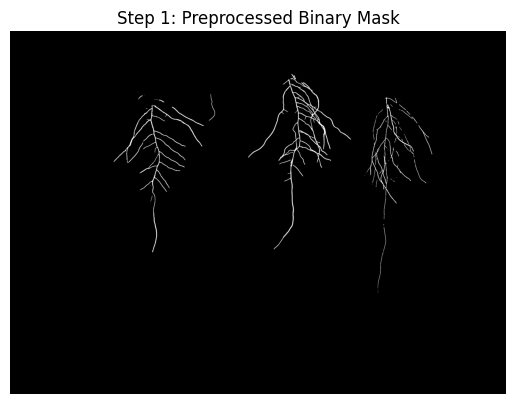

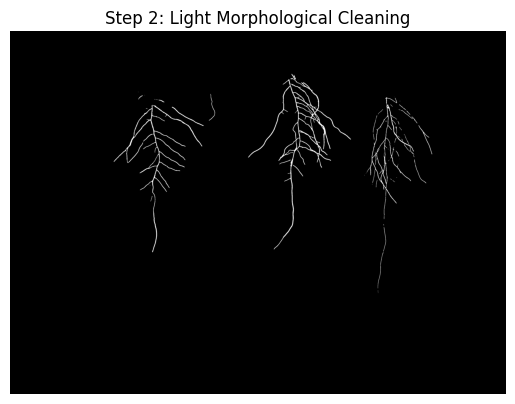

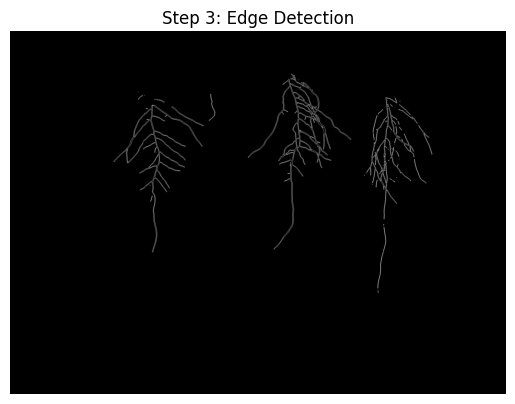

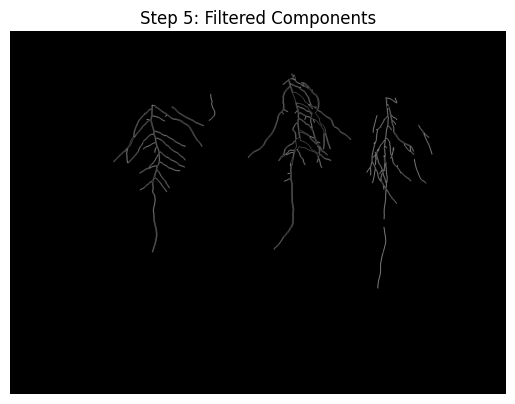

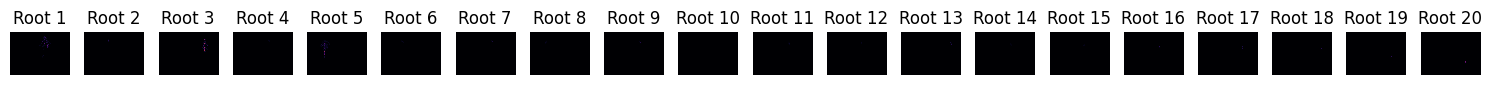

In [49]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Step 1: Load and preprocess the predicted mask
predicted_mask_path = "task5_test_image_prediction_artjom_234535.png"
predicted_mask = cv2.imread(predicted_mask_path, cv2.IMREAD_GRAYSCALE)

# Apply Gaussian blur to reduce noise
denosed_mask = cv2.GaussianBlur(predicted_mask, (3, 3), 0)

# Binarize the mask using a fixed threshold
_, binary_mask = cv2.threshold(denosed_mask, 100, 255, cv2.THRESH_BINARY)

plt.figure()
plt.title("Step 1: Preprocessed Binary Mask")
plt.imshow(binary_mask, cmap="gray")
plt.axis("off")
plt.show()

# Step 2: Light morphological cleaning
kernel = np.ones((3, 3), np.uint8)
cleaned_mask = cv2.morphologyEx(binary_mask, cv2.MORPH_CLOSE, kernel, iterations=1)

plt.figure()
plt.title("Step 2: Light Morphological Cleaning")
plt.imshow(cleaned_mask, cmap="gray")
plt.axis("off")
plt.show()

# Step 3: Edge detection using Laplacian
laplacian = cv2.Laplacian(cleaned_mask, cv2.CV_64F)
edge_mask = np.uint8(np.abs(laplacian))
edge_mask = cv2.threshold(edge_mask, 50, 255, cv2.THRESH_BINARY)[1]

plt.figure()
plt.title("Step 3: Edge Detection")
plt.imshow(edge_mask, cmap="gray")
plt.axis("off")
plt.show()

# Step 4: Detect connected components
num_labels, labels, stats, _ = cv2.connectedComponentsWithStats(edge_mask)

# Step 5: Filter connected components by size
min_area = 500
max_area = 30000
filtered_mask = np.zeros_like(edge_mask)

for label_idx in range(1, num_labels):  # Skip background
    area = stats[label_idx, cv2.CC_STAT_AREA]
    if min_area <= area <= max_area:
        filtered_mask[labels == label_idx] = 255

plt.figure()
plt.title("Step 5: Filtered Components")
plt.imshow(filtered_mask, cmap="gray")
plt.axis("off")
plt.show()

# Step 6: Extract individual root masks
num_labels_filtered, labels_filtered, stats_filtered, _ = cv2.connectedComponentsWithStats(filtered_mask)
individual_roots = []

for label_idx in range(1, num_labels_filtered):
    root_mask = np.zeros_like(filtered_mask)
    root_mask[labels_filtered == label_idx] = 255
    individual_roots.append(root_mask)

# Step 7: Ensure roots and visualize
if not individual_roots:
    print("No roots detected after filtering. Using fallback mask.")
    individual_roots = [filtered_mask]

fig, axes = plt.subplots(1, len(individual_roots), figsize=(15, 5))
for i, root_mask in enumerate(individual_roots):
    axes[i].imshow(root_mask, cmap="inferno")
    axes[i].axis("off")
    axes[i].set_title(f"Root {i+1}")
plt.tight_layout()
plt.show()

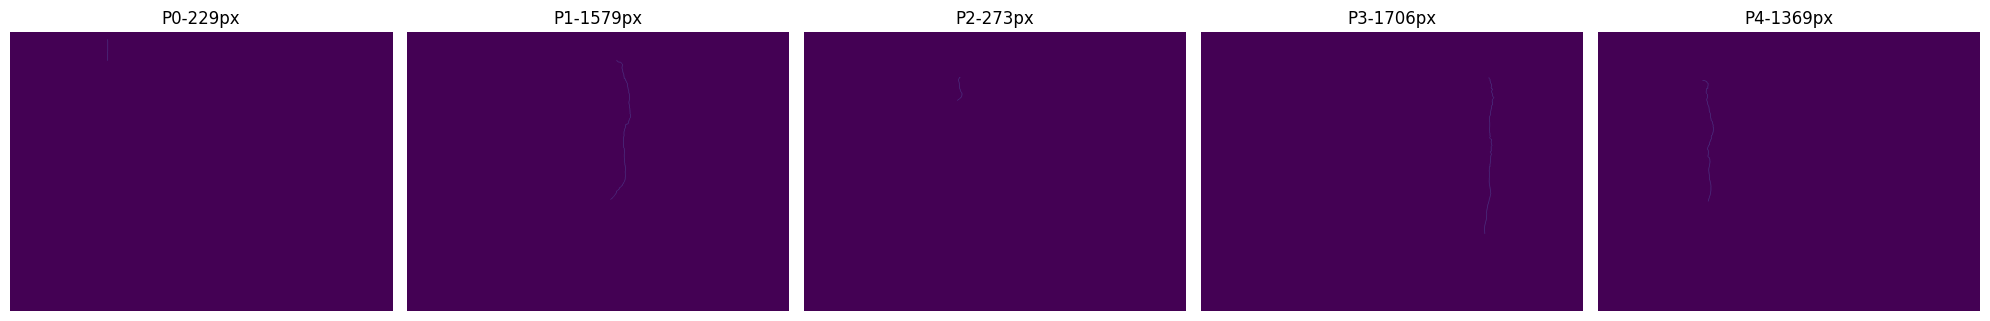

Root System Architecture Data:
Root 1:
  - Primary Root Length: 229 px
  - Start Coordinate: (89, 1049)
  - End Coordinate: (318, 1047)
Root 2:
  - Primary Root Length: 1579 px
  - Start Coordinate: (311, 2257)
  - End Coordinate: (1810, 2190)
Root 3:
  - Primary Root Length: 273 px
  - Start Coordinate: (496, 1682)
  - End Coordinate: (747, 1649)
Root 4:
  - Primary Root Length: 1706 px
  - Start Coordinate: (498, 3100)
  - End Coordinate: (2177, 3054)
Root 5:
  - Primary Root Length: 1369 px
  - Start Coordinate: (532, 1125)
  - End Coordinate: (1829, 1184)


In [34]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import networkx as nx
from skimage.morphology import skeletonize

# Step 1: Extract skeletons for individual roots
root_skeletons = [skeletonize(root_mask // 255) for root_mask in individual_roots]

# Step 2: Extraction and analysis of the root system structure
rsa_data = []
fig, axes = plt.subplots(1, len(root_skeletons), figsize=(20, 5))

for i, skeleton in enumerate(root_skeletons):
    # Getting the coordinates of the skeleton
    coords = np.argwhere(skeleton > 0)
    if len(coords) == 0:
        print(f"Root {i + 1} does not contain any skeleton pixels.")
        continue

    # Building the graph
    G = nx.Graph()
    coord_to_node = {}
    for idx, (y, x) in enumerate(coords):
        G.add_node(idx, coord=(y, x))
        coord_to_node[(y, x)] = idx

    # Adding edges (8-connectivity)
    for y, x in coords:
        for dy, dx in [(-1, 0), (1, 0), (0, -1), (0, 1), (-1, -1), (-1, 1), (1, -1), (1, 1)]:
            neighbor = (y + dy, x + dx)
            if neighbor in coord_to_node:
                G.add_edge(coord_to_node[(y, x)], coord_to_node[neighbor])

    # Determining the start and end points
    start_node = min(G.nodes, key=lambda n: G.nodes[n]["coord"][0])  # The topmost point
    end_node, lengths = None, {}
    try:
        lengths, paths = nx.single_source_dijkstra(G, start_node)
        end_node = max(lengths, key=lengths.get)
    except nx.NetworkXNoPath:
        print(f"Root {i + 1}: the graph has no connections!")
        continue

    # Coordinates of the start and end points
    start_coord = G.nodes[start_node]["coord"]
    end_coord = G.nodes[end_node]["coord"]

    # Building the primary root path
    primary_root_path = [G.nodes[node]["coord"] for node in paths[end_node]]

    # Creating a mask of the primary root
    primary_root_mask = np.zeros_like(skeleton, dtype=np.uint8)
    for y, x in primary_root_path:
        primary_root_mask[y, x] = 255

    # Visualizing the primary root
    axes[i].imshow(primary_root_mask)
    axes[i].set_title(f"P{i}-{int(lengths[end_node])}px")
    axes[i].axis("off")

    # Saving the data
    rsa_data.append({
        "root_index": i,
        "primary_root_length": lengths[end_node],
        "start_coord": start_coord,
        "end_coord": end_coord,
    })

plt.tight_layout()
plt.show()

# Step 3: Print RSA summary
print("Root System Architecture Data:")
for root_info in rsa_data:
    print(f"Root {root_info['root_index'] + 1}:")
    print(f"  - Primary Root Length: {root_info['primary_root_length']} px")
    print(f"  - Start Coordinate: {root_info['start_coord']}")
    print(f"  - End Coordinate: {root_info['end_coord']}")

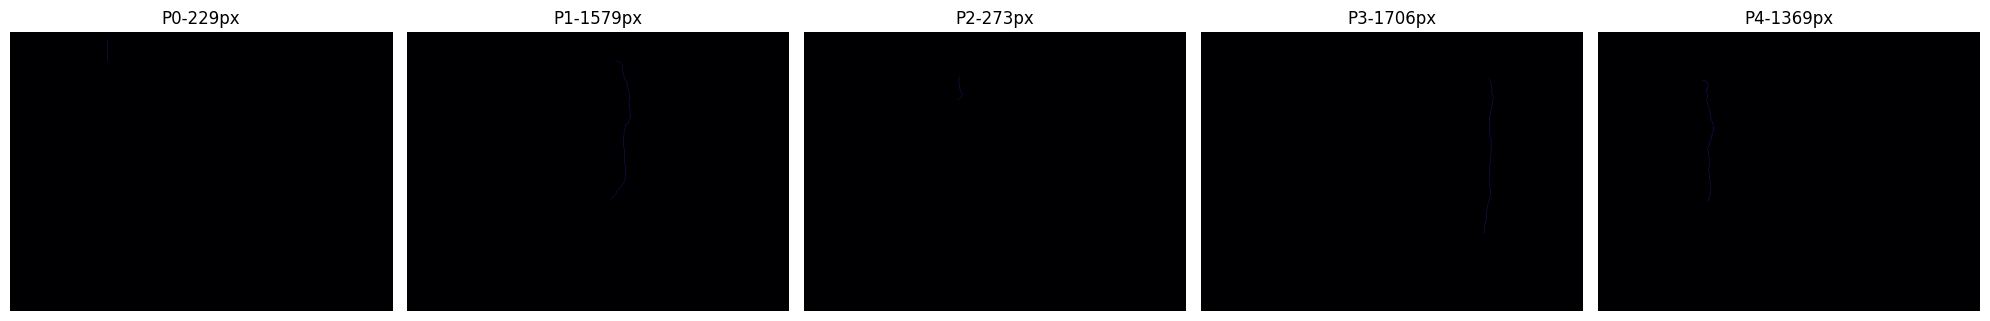

Root System Architecture Data:
Root 1:
  - Primary Root Length: 229 px
  - Start Coordinate: (89, 1049)
  - End Coordinate: (318, 1047)
Root 2:
  - Primary Root Length: 1579 px
  - Start Coordinate: (311, 2257)
  - End Coordinate: (1810, 2190)
Root 3:
  - Primary Root Length: 273 px
  - Start Coordinate: (496, 1682)
  - End Coordinate: (747, 1649)
Root 4:
  - Primary Root Length: 1706 px
  - Start Coordinate: (498, 3100)
  - End Coordinate: (2177, 3054)
Root 5:
  - Primary Root Length: 1369 px
  - Start Coordinate: (532, 1125)
  - End Coordinate: (1829, 1184)


In [37]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import networkx as nx
from skimage.morphology import skeletonize

# Step 1: Extract skeletons for individual roots
root_skeletons = [skeletonize(root_mask // 255) for root_mask in individual_roots]

# Step 2: Extraction and analysis of the root system structure
rsa_data = []
fig, axes = plt.subplots(1, len(root_skeletons), figsize=(20, 5))

for i, skeleton in enumerate(root_skeletons):
    # Getting the coordinates of the skeleton
    coords = np.argwhere(skeleton > 0)
    if len(coords) == 0:
        print(f"Root {i + 1} does not contain any skeleton pixels.")
        continue

    # Building the graph
    G = nx.Graph()
    coord_to_node = {}
    for idx, (y, x) in enumerate(coords):
        G.add_node(idx, coord=(y, x))
        coord_to_node[(y, x)] = idx

    # Adding edges (8-connectivity)
    for y, x in coords:
        for dy, dx in [(-1, 0), (1, 0), (0, -1), (0, 1), (-1, -1), (-1, 1), (1, -1), (1, 1)]:
            neighbor = (y + dy, x + dx)
            if neighbor in coord_to_node:
                G.add_edge(coord_to_node[(y, x)], coord_to_node[neighbor])

    # Determining the start and end points
    start_node = min(G.nodes, key=lambda n: G.nodes[n]["coord"][0])  # The topmost point
    end_node, lengths = None, {}
    try:
        lengths, paths = nx.single_source_dijkstra(G, start_node)
        end_node = max(lengths, key=lengths.get)
    except nx.NetworkXNoPath:
        print(f"Root {i + 1}: the graph has no connections!")
        continue

    # Coordinates of the start and end points
    start_coord = G.nodes[start_node]["coord"]
    end_coord = G.nodes[end_node]["coord"]

    # Building the primary root path
    primary_root_path = [G.nodes[node]["coord"] for node in paths[end_node]]

    # Creating a mask of the primary root
    primary_root_mask = np.zeros_like(skeleton, dtype=np.uint8)
    for y, x in primary_root_path:
        primary_root_mask[y, x] = 255

    # Visualizing the primary root
    axes[i].imshow(primary_root_mask, cmap='inferno')
    axes[i].set_title(f"P{i}-{int(lengths[end_node])}px")
    axes[i].axis("off")

    # Saving the data
    rsa_data.append({
        "root_index": i,
        "primary_root_length": lengths[end_node],
        "start_coord": start_coord,
        "end_coord": end_coord,
    })

plt.tight_layout()
plt.show()

# Step 3: Print RSA summary
print("Root System Architecture Data:")
for root_info in rsa_data:
    print(f"Root {root_info['root_index'] + 1}:")
    print(f"  - Primary Root Length: {root_info['primary_root_length']} px")
    print(f"  - Start Coordinate: {root_info['start_coord']}")
    print(f"  - End Coordinate: {root_info['end_coord']}")